# This notebook help to create a model to find next potential clients 

# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.realpath('../'))
sys.path.append(os.path.realpath('../../'))
from scripts.create_dataset import genererate_dataframe
from scripts.utils import Utils
from scripts.preprocess_data import Preprocces


# Loading data and overview

In [3]:
path = '../../data/'

In [4]:
df_data,df_client = genererate_dataframe(path)

[2021-02-07][15:18:30][scripts.create_dataset][INFO] Loading files
[2021-02-07][15:18:30][scripts.create_dataset][INFO] Dataframes generated


In [5]:
df_data.head()

,id,tipo_empresa,codpostal,municipio,provincia,comunidadautonoma,capitalpueblo,enpoligono,habitantes_municipio,tipo_de_zona,...,flotacamiones,flotaautobuses,riesgo,universo,existe_import,existe_export,existe_importexport,existe_email,es_ecommerce,impactos_publicidad
0,1,E,46008,VALENCIA,VALENCIA,COMUNITAT VALENCIANA,CAPITAL,0,786189,7,...,0,0,NaN,ACTIVEBUSINESS,0,0,0,1,0,3
1,2,E,28049,MADRID,MADRID,MADRID,CAPITAL,0,3141991,7,...,0,0,NaN,MARKETBASE,0,0,0,1,0,2
2,3,E,8172,SANT CUGAT DEL VALLÈS,BARCELONA,CATALUNYA,PUEBLO,0,87830,5,...,0,0,NaN,ACTIVEBUSINESS,0,0,0,1,0,3
3,4,E,8011,BARCELONA,BARCELONA,CATALUNYA,CAPITAL,0,1604555,7,...,0,0,NaN,ACTIVEBUSINESS,0,0,0,0,0,1
4,5,E,28031,MADRID,MADRID,MADRID,CAPITAL,1,3141991,7,...,0,0,NaN,ACTIVEBUSINESS,0,0,0,0,0,5


In [6]:
df_data.columns

Index(['id', 'tipo_empresa', 'codpostal', 'municipio', 'provincia',
       'comunidadautonoma', 'capitalpueblo', 'enpoligono',
       'habitantes_municipio', 'tipo_de_zona', 'actcnae', 'mercado',
       'cnae_mercado', 'rangoventas', 'rangoempleados', 'numoficinas',
       'tipooficina', 'anyofundacion', 'nse', 'tendenciaempleados',
       'tendenciaingresos', 'flotaturismos', 'flotafurgonetas',
       'flotacamiones', 'flotaautobuses', 'riesgo', 'universo',
       'existe_import', 'existe_export', 'existe_importexport', 'existe_email',
       'es_ecommerce', 'impactos_publicidad'],
      dtype='object')

In [7]:
df_data.dtypes

id                        int64
tipo_empresa             object
codpostal                 int64
municipio                object
provincia                object
comunidadautonoma        object
capitalpueblo            object
enpoligono                int64
habitantes_municipio      int64
tipo_de_zona              int64
actcnae                  object
mercado                  object
cnae_mercado             object
rangoventas             float64
rangoempleados          float64
numoficinas             float64
tipooficina              object
anyofundacion            object
nse                       int64
tendenciaempleados       object
tendenciaingresos        object
flotaturismos             int64
flotafurgonetas           int64
flotacamiones             int64
flotaautobuses            int64
riesgo                   object
universo                 object
existe_import             int64
existe_export             int64
existe_importexport       int64
existe_email              int64
es_ecomm

In [8]:
df = df_data.copy()

In [9]:
df

,id,tipo_empresa,codpostal,municipio,provincia,comunidadautonoma,capitalpueblo,enpoligono,habitantes_municipio,tipo_de_zona,...,flotacamiones,flotaautobuses,riesgo,universo,existe_import,existe_export,existe_importexport,existe_email,es_ecommerce,impactos_publicidad
0,1,E,46008,VALENCIA,VALENCIA,COMUNITAT VALENCIANA,CAPITAL,0,786189,7,...,0,0,NaN,ACTIVEBUSINESS,0,0,0,1,0,3
1,2,E,28049,MADRID,MADRID,MADRID,CAPITAL,0,3141991,7,...,0,0,NaN,MARKETBASE,0,0,0,1,0,2
2,3,E,8172,SANT CUGAT DEL VALLÈS,BARCELONA,CATALUNYA,PUEBLO,0,87830,5,...,0,0,NaN,ACTIVEBUSINESS,0,0,0,1,0,3
3,4,E,8011,BARCELONA,BARCELONA,CATALUNYA,CAPITAL,0,1604555,7,...,0,0,NaN,ACTIVEBUSINESS,0,0,0,0,0,1
4,5,E,28031,MADRID,MADRID,MADRID,CAPITAL,1,3141991,7,...,0,0,NaN,ACTIVEBUSINESS,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,E,8860,CASTELLDEFELS,BARCELONA,CATALUNYA,PUEBLO,0,63891,5,...,0,0,NaN,ACTIVEBUSINESS,0,0,0,1,0,0
99996,99997,E,29018,MÁLAGA,MALAGA,ANDALUCIA,CAPITAL,0,569130,7,...,0,0,NaN,MARKETBASE,0,0,0,0,0,2
99997,99998,E,46980,PATERNA,VALENCIA,COMUNITAT VALENCIANA,PUEBLO,0,67340,5,...,0,0,NaN,ACTIVEBUSINESS,0,0,0,1,0,6
99998,99999,E,8021,BARCELONA,BARCELONA,CATALUNYA,CAPITAL,0,1604555,7,...,0,0,NaN,ACTIVEBUSINESS,0,0,0,0,0,2


In [10]:
df.shape

(100000, 33)

In [11]:
df_client.head()

,id
0,1
1,2
2,3
3,4
4,5


In [12]:
df_client.shape

(5278, 1)

In [13]:
df_client.isna().sum()

id    0
dtype: int64

Creating a new column called client that contain:

**1:** is a client 
**0:** is not a client  

In [14]:
Id = df_client.id.values.tolist()

In [15]:
df['client'] = df.id.apply(lambda x: 1 if x in Id else 0)

Now the datatset is ready to be analyzed

In [16]:
df.head()

,id,tipo_empresa,codpostal,municipio,provincia,comunidadautonoma,capitalpueblo,enpoligono,habitantes_municipio,tipo_de_zona,...,flotaautobuses,riesgo,universo,existe_import,existe_export,existe_importexport,existe_email,es_ecommerce,impactos_publicidad,client
0,1,E,46008,VALENCIA,VALENCIA,COMUNITAT VALENCIANA,CAPITAL,0,786189,7,...,0,NaN,ACTIVEBUSINESS,0,0,0,1,0,3,1
1,2,E,28049,MADRID,MADRID,MADRID,CAPITAL,0,3141991,7,...,0,NaN,MARKETBASE,0,0,0,1,0,2,1
2,3,E,8172,SANT CUGAT DEL VALLÈS,BARCELONA,CATALUNYA,PUEBLO,0,87830,5,...,0,NaN,ACTIVEBUSINESS,0,0,0,1,0,3,1
3,4,E,8011,BARCELONA,BARCELONA,CATALUNYA,CAPITAL,0,1604555,7,...,0,NaN,ACTIVEBUSINESS,0,0,0,0,0,1,1
4,5,E,28031,MADRID,MADRID,MADRID,CAPITAL,1,3141991,7,...,0,NaN,ACTIVEBUSINESS,0,0,0,0,0,5,1


# EDA

In this section the data will be analyzed. This process is very important as it helps to find important patterns and characteristics in the data.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100000.0,50000.500000,2.886766e+04,1.0,25000.75,50000.5,75000.25,100000.0
codpostal,100000.0,23680.691800,1.408236e+04,1001.0,8710.00,28004.0,30820.00,51002.0
enpoligono,100000.0,0.170770,3.763097e-01,0.0,0.00,0.0,0.00,1.0
habitantes_municipio,100000.0,637943.890040,1.046474e+06,0.0,14420.00,87830.0,693878.00,3141991.0
tipo_de_zona,100000.0,4.710400,2.134830e+00,1.0,3.00,5.0,7.00,7.0
rangoventas,99999.0,3.222532,2.084130e+00,1.0,1.00,3.0,5.00,10.0
rangoempleados,95996.0,107.880849,1.309027e+01,0.0,100.00,105.0,110.00,210.0
numoficinas,95946.0,0.120057,2.170808e+00,0.0,0.00,0.0,0.00,337.0
nse,100000.0,2.686010,1.818663e+00,0.0,0.00,3.0,4.00,5.0
flotaturismos,100000.0,0.084630,2.783317e-01,0.0,0.00,0.0,0.00,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    100000 non-null  int64  
 1   tipo_empresa          100000 non-null  object 
 2   codpostal             100000 non-null  int64  
 3   municipio             100000 non-null  object 
 4   provincia             100000 non-null  object 
 5   comunidadautonoma     100000 non-null  object 
 6   capitalpueblo         100000 non-null  object 
 7   enpoligono            100000 non-null  int64  
 8   habitantes_municipio  100000 non-null  int64  
 9   tipo_de_zona          100000 non-null  int64  
 10  actcnae               99990 non-null   object 
 11  mercado               99990 non-null   object 
 12  cnae_mercado          100000 non-null  object 
 13  rangoventas           99999 non-null   float64
 14  rangoempleados        95996 non-null   float64
 15  n

In [19]:
df.shape

(100000, 34)

Creating a list type variable called **col_remove**, in which the features that are not important for our goal will be added

In [20]:
col_remove = ['id']

## Analysis of Missing Values 

In [21]:
df.isna().sum()

id                          0
tipo_empresa                0
codpostal                   0
municipio                   0
provincia                   0
comunidadautonoma           0
capitalpueblo               0
enpoligono                  0
habitantes_municipio        0
tipo_de_zona                0
actcnae                    10
mercado                    10
cnae_mercado                0
rangoventas                 1
rangoempleados           4004
numoficinas              4054
tipooficina                 0
anyofundacion            9004
nse                         0
tendenciaempleados      53813
tendenciaingresos       62117
flotaturismos               0
flotafurgonetas             0
flotacamiones               0
flotaautobuses              0
riesgo                  99372
universo                   13
existe_import               0
existe_export               0
existe_importexport         0
existe_email                0
es_ecommerce                0
impactos_publicidad         0
client    

Loading a class called Utils, this class helps to vizualize the data

In [22]:
utils = Utils()

[2021-02-07][15:18:37][scripts.utils][INFO] Class is initialized


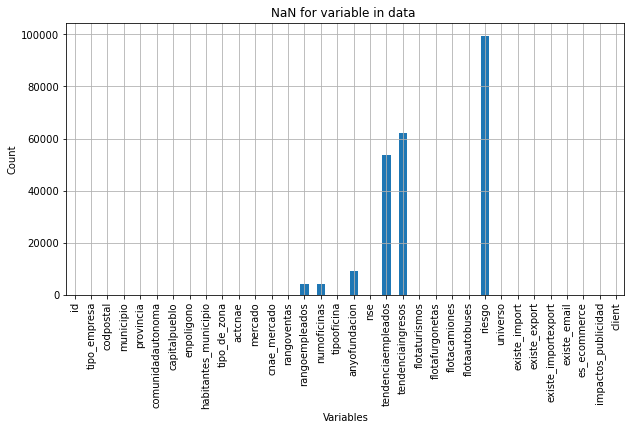

In [23]:
utils.plot_variables_nan(df)

In [24]:
utils.df_nan

,Variables,Number_of_nan
0,id,0
1,tipo_empresa,0
2,codpostal,0
3,municipio,0
4,provincia,0
5,comunidadautonoma,0
6,capitalpueblo,0
7,enpoligono,0
8,habitantes_municipio,0
9,tipo_de_zona,0


Removing the **riesgo** variable since it has more than 99% the NaN

In [25]:
df = df.drop(columns=['riesgo'])

In [26]:
df.shape

(100000, 33)

## Analysis of target value

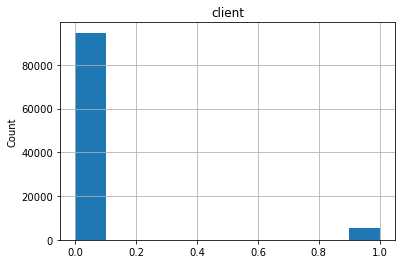

In [27]:
df[['client']].hist()
plt.ylabel('Count')
plt.show()

In [28]:
df.client.value_counts()

0    94722
1     5278
Name: client, dtype: int64

In [29]:
print(f"Percentage of target 0 : {round(df.client.value_counts().values[0] * 100 / len(df))} %" )

Percentage of target 0 : 95 %


In [30]:
print(f"Percentage of target 1 : {round(df.client.value_counts().values[1] * 100 / len(df))} %")

Percentage of target 1 : 5 %


## Analysis of Categorical Variables

In [31]:
df.select_dtypes(include ='object').columns

Index(['tipo_empresa', 'municipio', 'provincia', 'comunidadautonoma',
       'capitalpueblo', 'actcnae', 'mercado', 'cnae_mercado', 'tipooficina',
       'anyofundacion', 'tendenciaempleados', 'tendenciaingresos', 'universo'],
      dtype='object')

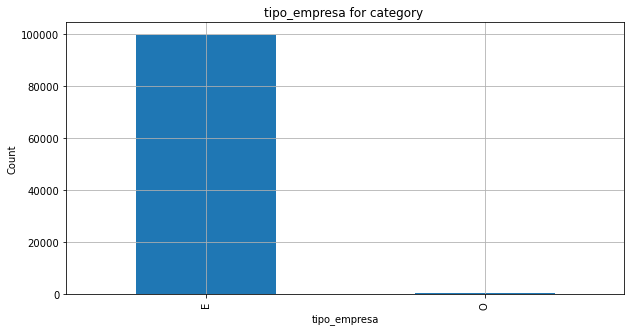

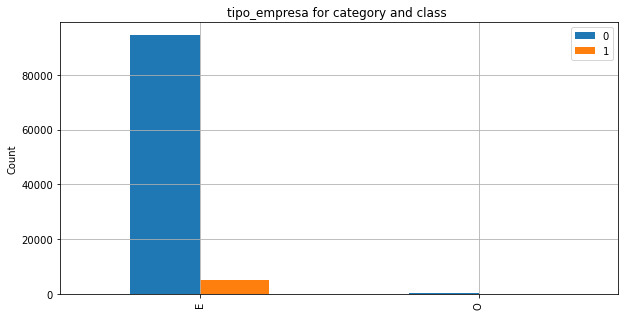

In [32]:
utils.plot_variable(df,'tipo_empresa')
utils.plot_variable_per_target(df,'tipo_empresa','client')

This dataframe represents the percentage of the customer per variable.

**Columns:** 1: is a client, 0: is not a client

**Row:** Variable value

This percentage will be taken into account for the selection of variables to eliminate.

This process is carried out with all variables.

In [33]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
E,99.672727,99.962107
O,0.327273,0.037893


This variable **tipo_empresa** is added to col_remove since there is no difference between customer and non-customer. 99% of clients are companies

In [34]:
col_remove.append('tipo_empresa')

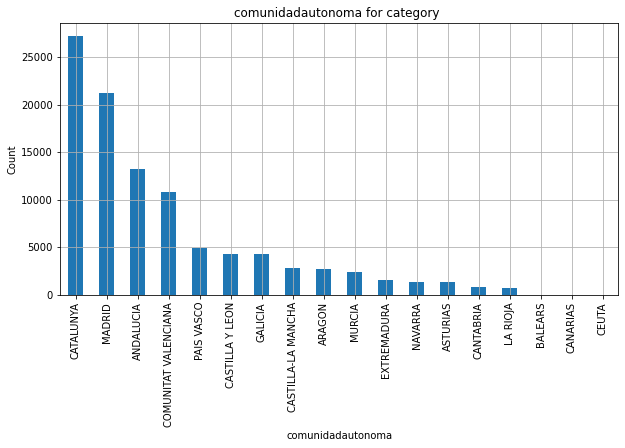

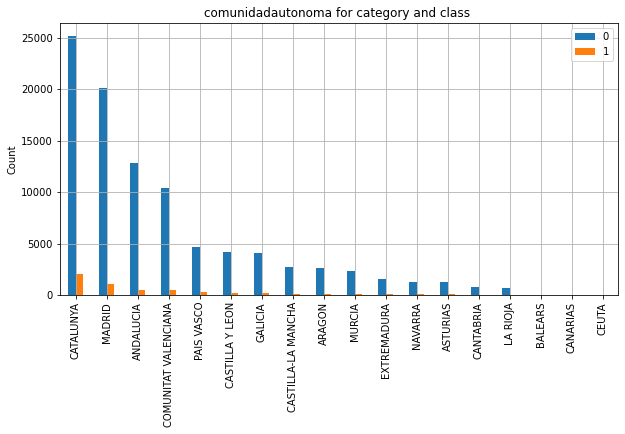

In [35]:
utils.plot_variable(df,'comunidadautonoma')
utils.plot_variable_per_target(df,'comunidadautonoma','client')

In [36]:
df_community = utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)
df_community.fillna(value=0,inplace=True)
df_community

,0,1
CATALUNYA,26.586221,38.897310
MADRID,21.268554,19.893899
COMUNITAT VALENCIANA,10.955216,9.378552
ANDALUCIA,13.522730,8.791209
PAIS VASCO,4.894322,5.323986
GALICIA,4.299951,3.524062
CASTILLA Y LEON,4.431917,2.823039
ARAGON,2.722704,2.406214
CASTILLA-LA MANCHA,2.905344,2.387268
MURCIA,2.461941,1.610459


In [37]:
df_community[df_community['1']>3]['1'].sum()

85.80901856763924

Creating a new variable called **community_not_client**. This variable contains the communities that do not belong to 85% of the clients

In [38]:
community_not_client = list(df_community[df_community['1']<3].index)
community_not_client

['CASTILLA Y LEON',
 'ARAGON',
 'CASTILLA-LA MANCHA',
 'MURCIA',
 'NAVARRA',
 'ASTURIAS',
 'EXTREMADURA',
 'LA RIOJA',
 'CANTABRIA',
 'BALEARS',
 'CANARIAS',
 'CEUTA']

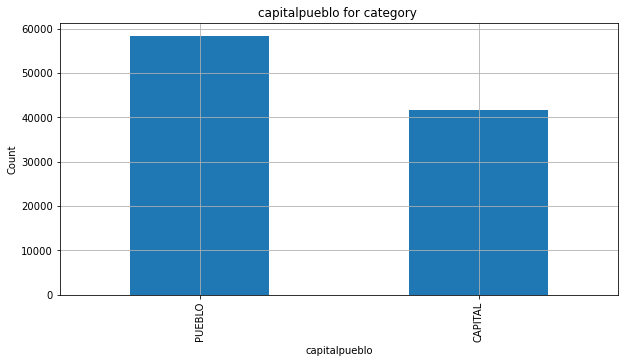

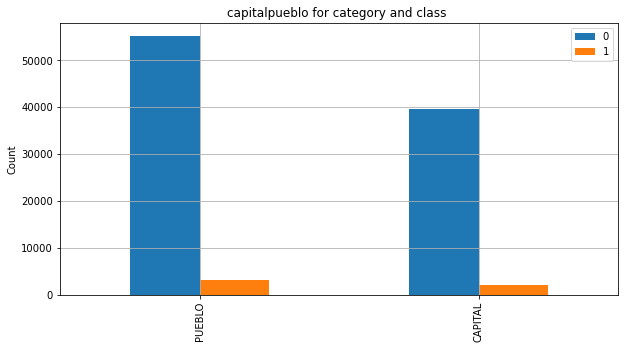

In [39]:
utils.plot_variable(df,'capitalpueblo')
utils.plot_variable_per_target(df,'capitalpueblo','client')

In [40]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
PUEBLO,58.273685,60.629026
CAPITAL,41.726315,39.370974


In [41]:
df_actcnae = utils.plot_variable(df,'actcnae',True)

In [42]:
df_actcnae

,actcnae,Count
0,COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COM...,2932
1,AGENTES DE LA PROPIEDAD INMOBILIARIA,2752
2,PELUQUERÍA Y OTROS TRATAMIENTOS DE BELLEZA,2504
3,INSTALACIONES ELÉCTRICAS,2337
4,AGENCIAS DE PUBLICIDAD,2126
...,...,...
557,"INTERMEDIARIOS DEL COMERCIO DE MAQUINARIA, EQU...",1
558,FABRICACIÓN DE OTRO MATERIAL Y EQUIPO ELÉCTRICO,1
559,SEGUROS DE VIDA,1
560,ACTIVIDADES DE CONSTRUCCIÓN ESPECIALIZADA,1


In [43]:
df_actcnae_class= utils.plot_variable_per_target(df,'actcnae','client',True)

In [44]:
df_actcnae_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
"COMERCIO AL POR MAYOR E INTERMEDIARIOS DEL COMERCIO, EXCEPTO DE VEHÍCULOS DE MOTOR Y MOTOCICLETAS",2.920432,3.145131
COMERCIO AL POR MENOR POR CORRESPONDENCIA O INTERNET,1.259608,3.145131
OTRAS ACTIVIDADES DE IMPRESIÓN Y ARTES GRÁFICAS,0.920686,2.936718
AGENCIAS DE PUBLICIDAD,2.091604,2.747253
COMERCIO AL POR MAYOR DE MÁQUINAS HERRAMIENTA,1.277557,2.728306
...,...,...
"INTERMEDIARIOS DEL COMERCIO DE MAQUINARIA, EQUIPO INDUSTRIAL, EMBARCACIONES Y AERONAVES",0.001056,NaN
FABRICACIÓN DE OTRO MATERIAL Y EQUIPO ELÉCTRICO,0.001056,NaN
SEGUROS DE VIDA,0.001056,NaN
ACTIVIDADES DE CONSTRUCCIÓN ESPECIALIZADA,0.001056,NaN


Adding the **actcnae** variable since the **cnae_mercado** variable will be taken into account since it encompasses a **actcnae**

In [45]:
col_remove.append('actcnae')

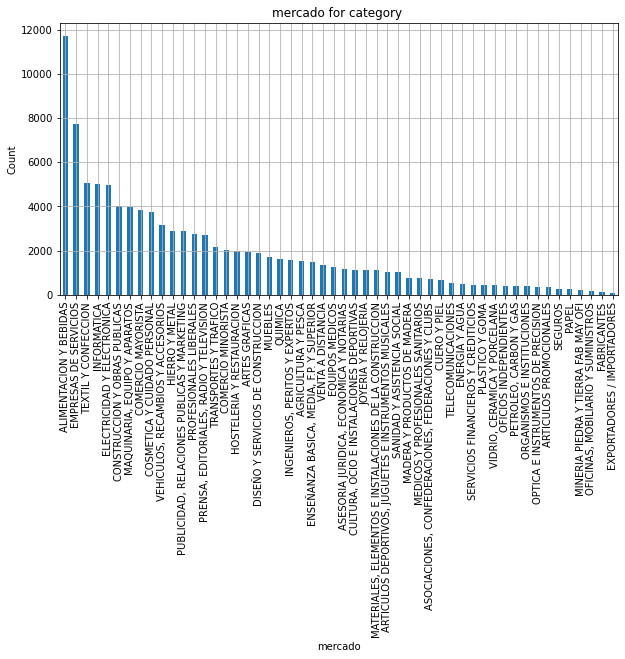

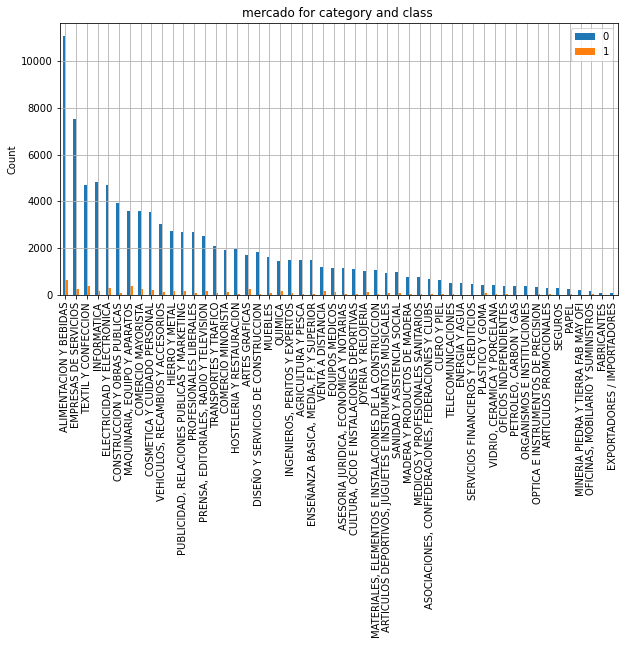

In [46]:
utils.plot_variable(df,'mercado')
utils.plot_variable_per_target(df,'mercado','client')

In [47]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
ALIMENTACION Y BEBIDAS,11.690177,12.201592
"MAQUINARIA, EQUIPO Y APARATOS",3.784103,7.218643
TEXTIL Y CONFECCION,4.966636,6.839712
ELECTRICIDAD Y ELECTRONICA,4.938128,5.361879
COMERCIO MAYORISTA,3.788327,4.736643
EMPRESAS DE SERVICIOS,7.919799,4.641910
ARTES GRAFICAS,1.818143,4.452444
COSMETICA Y CUIDADO PERSONAL,3.736591,4.111406
INFORMATICA,5.113396,3.467222
"PUBLICIDAD, RELACIONES PUBLICAS Y MARKETING",2.841245,3.372490


Adding the **mercado** variable since the **cnae_mercado** variable will be taken into account since it encompasses a **mercado**

In [48]:
col_remove.append('mercado')

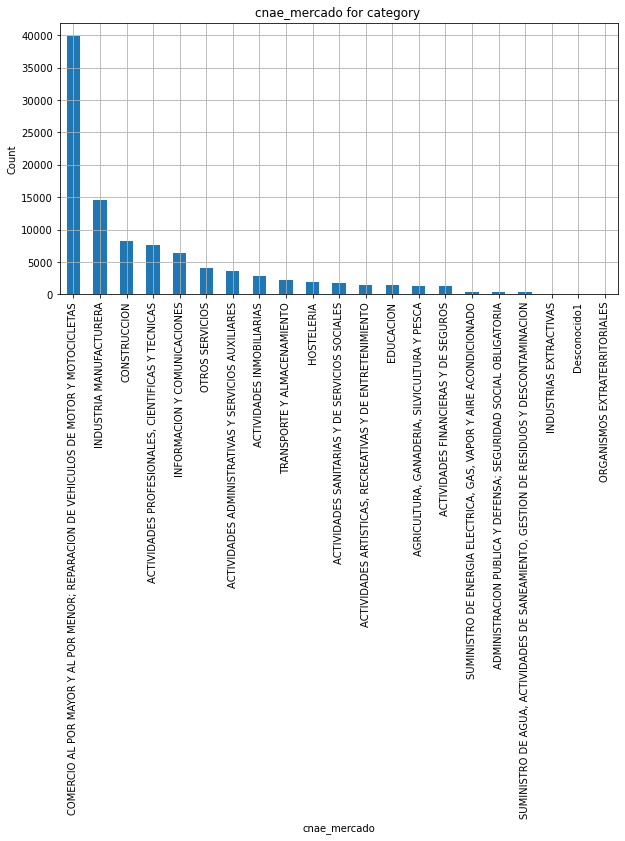

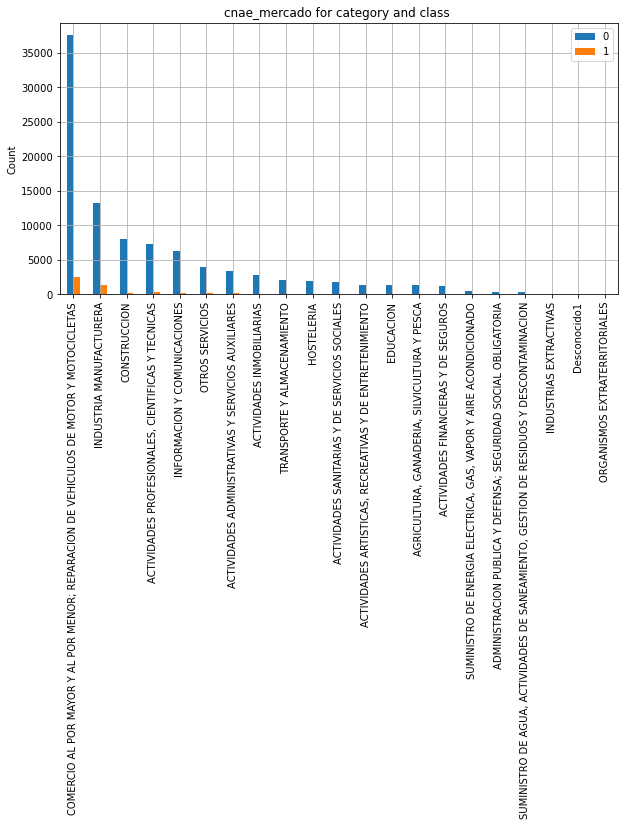

In [49]:
utils.plot_variable(df,'cnae_mercado')
utils.plot_variable_per_target(df,'cnae_mercado','client')


In [50]:
df_cnae_market =utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)
df_cnae_market.fillna(value=0, inplace=True)
df_cnae_market

,0,1
COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACION DE VEHICULOS DE MOTOR Y MOTOCICLETAS,39.568421,47.120121
INDUSTRIA MANUFACTURERA,13.955575,26.468359
"ACTIVIDADES PROFESIONALES, CIENTIFICAS Y TECNICAS",7.698317,7.086017
INFORMACION Y COMUNICACIONES,6.562361,4.774536
CONSTRUCCION,8.499609,2.804092
ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXILIARES,3.615844,2.425161
OTROS SERVICIOS,4.122590,2.292535
TRANSPORTE Y ALMACENAMIENTO,2.220181,1.762031
ACTIVIDADES SANITARIAS Y DE SERVICIOS SOCIALES,1.824286,1.117848
"ACTIVIDADES ARTISTICAS, RECREATIVAS Y DE ENTRETENIMIENTO",1.466396,0.757863


In [51]:
df_cnae_market[df_cnae_market['1']>3]['1'].sum()

85.4490337248958

Creating a new variable called **cnae_market_not_client**. This variable contains the cnae_market that do not belong to 85% of the clients

In [52]:
cnae_market_not_client = df_cnae_market[df_cnae_market['1']<3].index
cnae_market_not_client

Index(['CONSTRUCCION', 'ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXILIARES',
       'OTROS SERVICIOS', 'TRANSPORTE Y ALMACENAMIENTO',
       'ACTIVIDADES SANITARIAS Y DE SERVICIOS SOCIALES',
       'ACTIVIDADES ARTISTICAS, RECREATIVAS Y DE ENTRETENIMIENTO',
       'AGRICULTURA, GANADERIA, SILVICULTURA Y PESCA', 'EDUCACION',
       'HOSTELERIA', 'ACTIVIDADES INMOBILIARIAS',
       'SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO, GESTION DE RESIDUOS Y DESCONTAMINACION',
       'ACTIVIDADES FINANCIERAS Y DE SEGUROS',
       'SUMINISTRO DE ENERGIA ELECTRICA, GAS, VAPOR Y AIRE ACONDICIONADO',
       'ADMINISTRACION PUBLICA Y DEFENSA; SEGURIDAD SOCIAL OBLIGATORIA',
       'INDUSTRIAS EXTRACTIVAS', 'Desconocido1',
       'ORGANISMOS EXTRATERRITORIALES'],
      dtype='object')

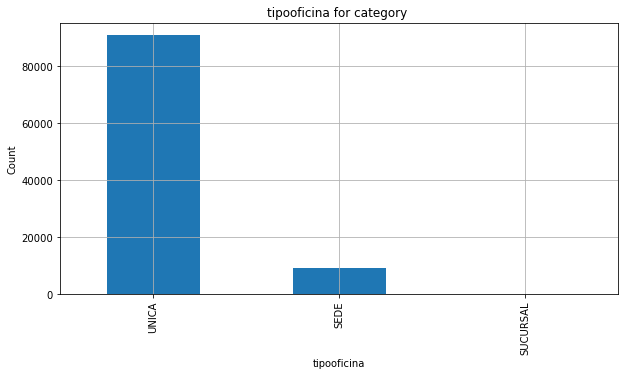

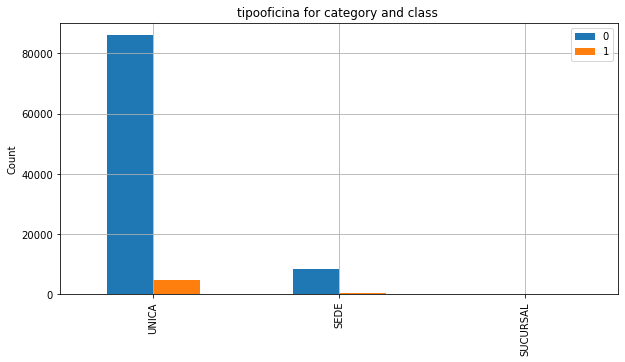

In [53]:
utils.plot_variable(df,'tipooficina')
utils.plot_variable_per_target(df,'tipooficina','client')

In [54]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
UNICA,90.788835,89.787798
SEDE,9.043306,9.946950
SUCURSAL,0.167860,0.265252


In [55]:
df_fundacion = utils.plot_variable(df,'anyofundacion',True)


In [56]:
df_fundacion['time'] = pd.to_datetime(df_fundacion.anyofundacion, format='%d/%m/%Y')

In [57]:
df_fundacion

,anyofundacion,Count,time
0,01/01/2005,1204,2005-01-01
1,31/12/2004,725,2004-12-31
2,31/12/2003,591,2003-12-31
3,01/01/2000,559,2000-01-01
4,01/01/2004,555,2004-01-01
...,...,...,...
9837,29/06/1989,1,1989-06-29
9838,18/02/1983,1,1983-02-18
9839,25/10/1948,1,1948-10-25
9840,13/05/1983,1,1983-05-13


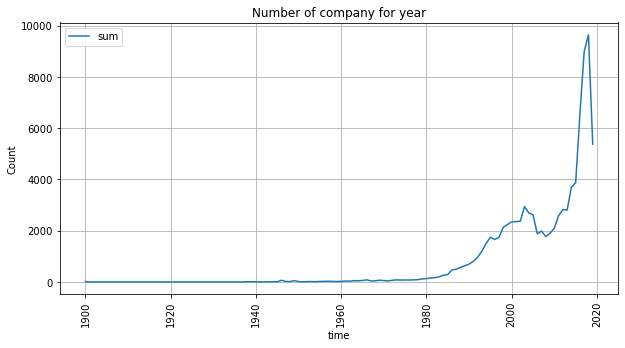

In [58]:
df_fundacion.groupby(df_fundacion['time'].dt.year,as_index=False)['Count'].agg(['sum']).plot(rot=90,grid=True,figsize=(10, 5),legend=True)
plt.title(f"Number of company for year")
plt.ylabel('Count')
plt.show()

In [59]:
df_fundacion_class = utils.plot_variable_per_target(df,'anyofundacion','client',True)

In [60]:
df_fundacion_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
01/01/2005,1.318007,1.412144
31/12/2004,0.806611,0.625378
01/01/2004,0.616000,0.504337
31/12/2003,0.659003,0.484164
01/01/2017,0.161555,0.463990
...,...,...
29/06/1989,0.001162,NaN
18/02/1983,0.001162,NaN
25/10/1948,0.001162,NaN
13/05/1983,0.001162,NaN


In [61]:
df_fundacion_class['time'] = pd.to_datetime(df_fundacion_class.index, format='%d/%m/%Y')

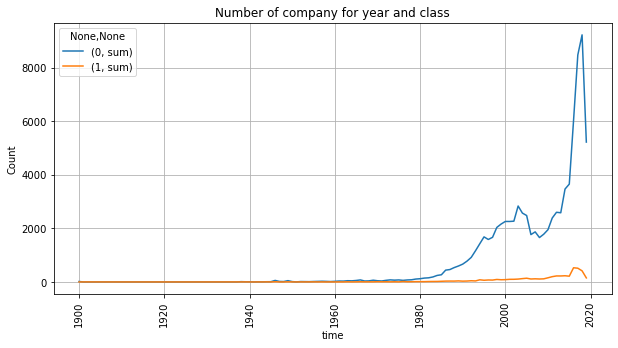

In [62]:
df_fundacion_class.groupby(df_fundacion_class['time'].dt.year,as_index=False)['0','1'].agg(['sum']).plot(rot=90,grid=True, figsize=(10, 5),legend=True)
plt.title(f"Number of company for year and class")
plt.ylabel('Count')
plt.show()

Adding the **anyofundacion** variable since further it will be apply a transformation to this variable

In [63]:
col_remove.append('anyofundacion')
col_remove

['id', 'tipo_empresa', 'actcnae', 'mercado', 'anyofundacion']

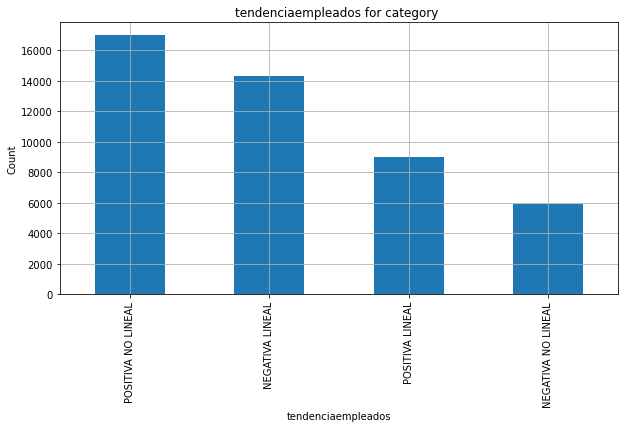

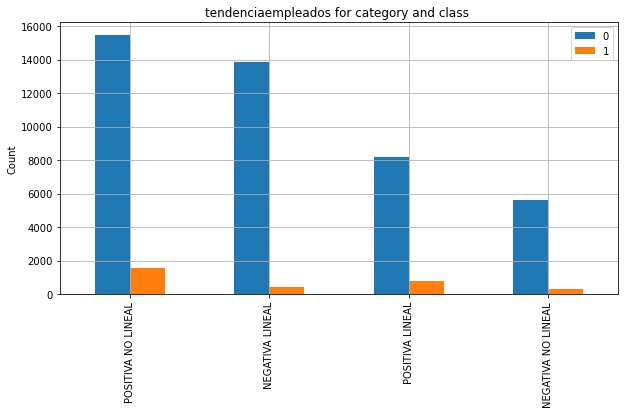

In [64]:
utils.plot_variable(df,'tendenciaempleados')
utils.plot_variable_per_target(df,'tendenciaempleados','client')

In [65]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
POSITIVA NO LINEAL,35.834435,49.870382
POSITIVA LINEAL,18.946196,26.409592
NEGATIVA LINEAL,32.187188,13.771873
NEGATIVA NO LINEAL,13.032180,9.948153


The **tendenciaempleados** variable is eliminated since it has more than 53% of missing values and it is dificult to impute all values.

In [66]:
col_remove.append('tendenciaempleados')

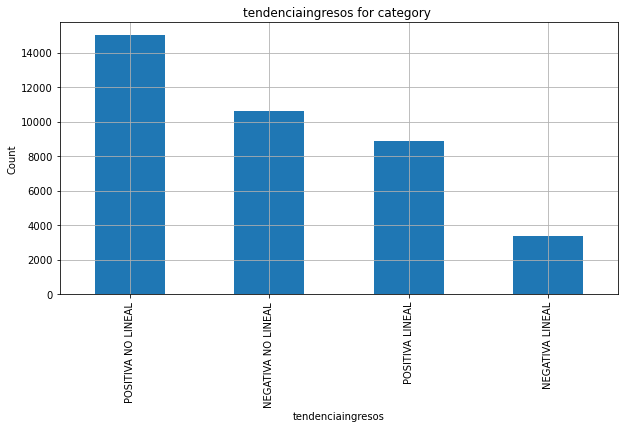

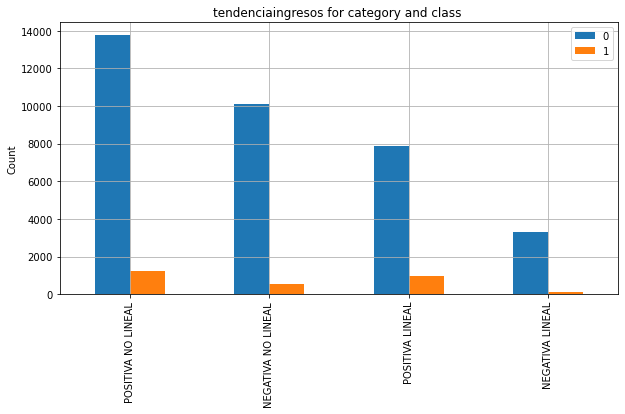

In [67]:
utils.plot_variable(df,'tendenciaingresos')
utils.plot_variable_per_target(df,'tendenciaingresos','client')

In [68]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
POSITIVA NO LINEAL,39.268585,43.607706
POSITIVA LINEAL,22.464885,34.360771
NEGATIVA NO LINEAL,28.894028,18.178634
NEGATIVA LINEAL,9.372502,3.852890


The **tendenciaingresos** variable is eliminated since it has more than 63% of missing values and it is dificult to impute all values.

In [69]:
col_remove.append('tendenciaingresos')

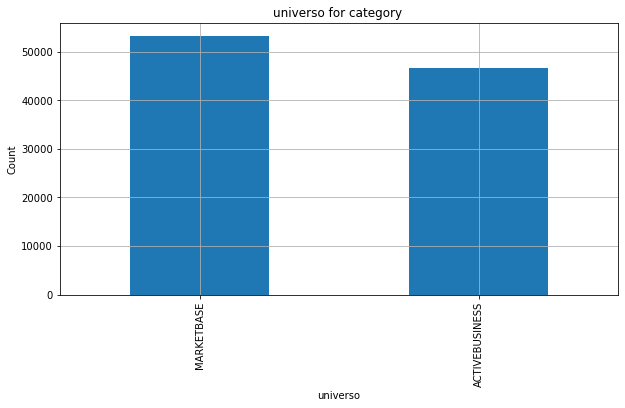

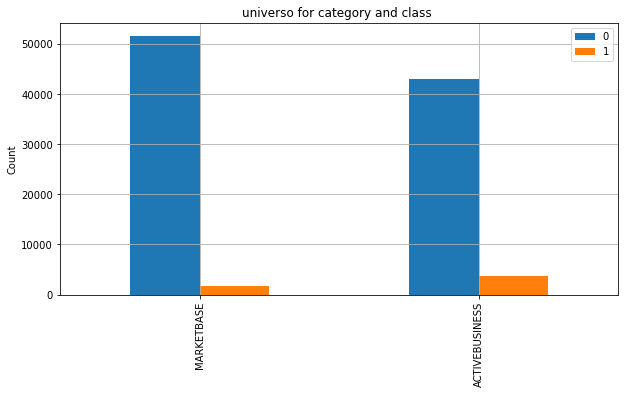

In [70]:
utils.plot_variable(df,'universo')
utils.plot_variable_per_target(df,'universo','client')

In [71]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
ACTIVEBUSINESS,45.44869,69.192876
MARKETBASE,54.55131,30.807124


## Analysis of Numerical Variables

In [72]:
df_numeric = df.select_dtypes(include =['float64','int64'])

In [73]:
df_numeric

,id,codpostal,enpoligono,habitantes_municipio,tipo_de_zona,rangoventas,rangoempleados,numoficinas,nse,flotaturismos,flotafurgonetas,flotacamiones,flotaautobuses,existe_import,existe_export,existe_importexport,existe_email,es_ecommerce,impactos_publicidad,client
0,1,46008,0,786189,7,7.0,125.0,NaN,4,0,0,0,0,0,0,0,1,0,3,1
1,2,28049,0,3141991,7,1.0,NaN,NaN,3,0,0,0,0,0,0,0,1,0,2,1
2,3,8172,0,87830,5,7.0,135.0,NaN,5,0,0,0,0,0,0,0,1,0,3,1
3,4,8011,0,1604555,7,6.0,100.0,NaN,5,0,0,0,0,0,0,0,0,0,1,1
4,5,28031,1,3141991,7,4.0,120.0,NaN,0,0,0,0,0,0,0,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,8860,0,63891,5,3.0,105.0,0.0,3,0,0,0,0,0,0,0,1,0,0,0
99996,99997,29018,0,569130,7,2.0,100.0,0.0,2,0,0,0,0,0,0,0,0,0,2,0
99997,99998,46980,0,67340,5,7.0,115.0,0.0,0,0,1,0,0,0,0,0,1,0,6,0
99998,99999,8021,0,1604555,7,6.0,120.0,0.0,5,1,0,0,0,0,0,0,0,0,2,0


In [74]:
df_numeric.columns[1:]

Index(['codpostal', 'enpoligono', 'habitantes_municipio', 'tipo_de_zona',
       'rangoventas', 'rangoempleados', 'numoficinas', 'nse', 'flotaturismos',
       'flotafurgonetas', 'flotacamiones', 'flotaautobuses', 'existe_import',
       'existe_export', 'existe_importexport', 'existe_email', 'es_ecommerce',
       'impactos_publicidad', 'client'],
      dtype='object')

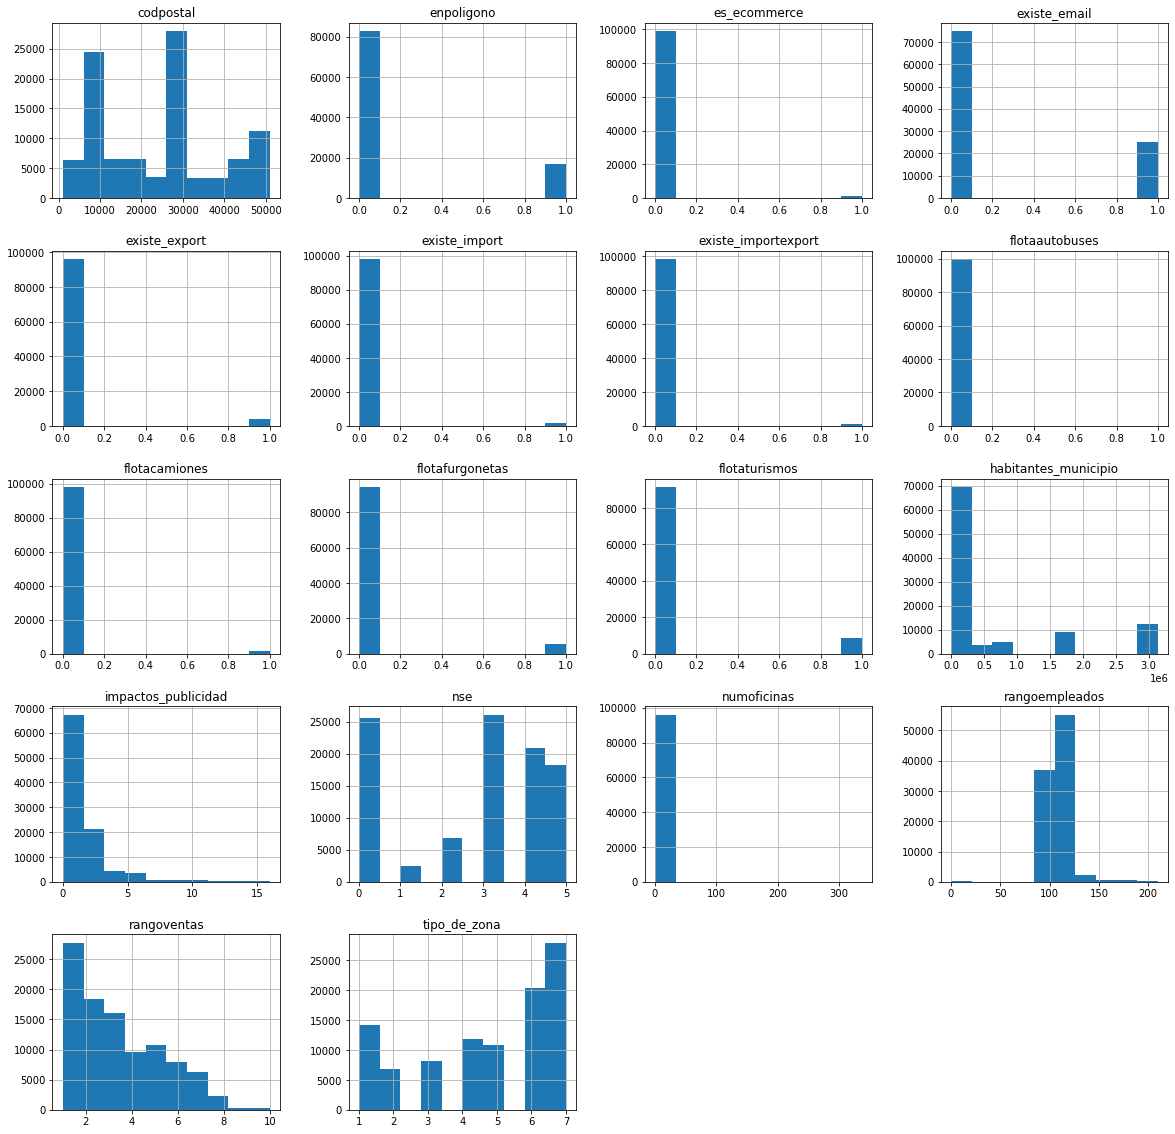

In [75]:
df_numeric[df_numeric.columns[1:-1]].hist(grid=True, figsize=(20, 20))
plt.show()

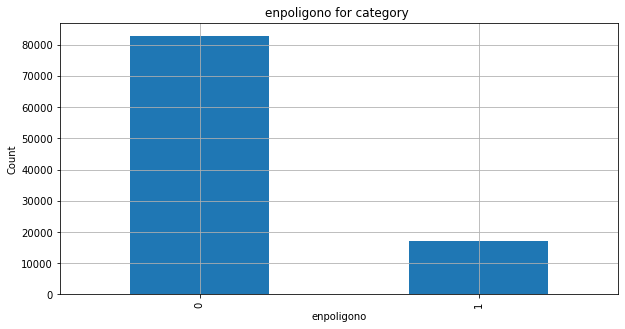

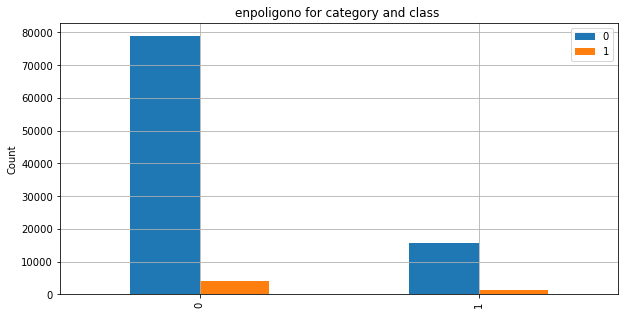

In [76]:
utils.plot_variable(df_numeric,'enpoligono')
utils.plot_variable_per_target(df_numeric,'enpoligono','client')

In [77]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0,83.379785,74.725275
1,16.620215,25.274725


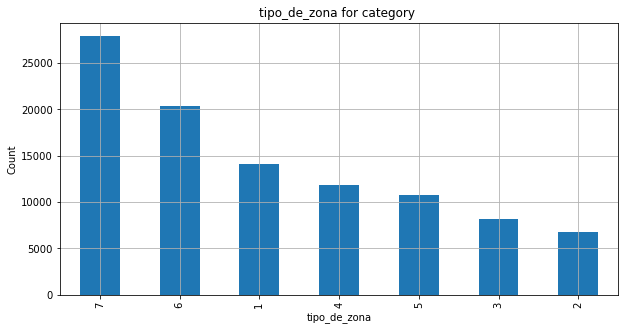

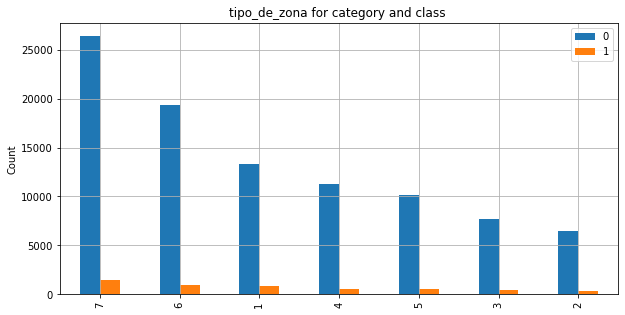

In [78]:
utils.plot_variable(df_numeric,'tipo_de_zona')
utils.plot_variable_per_target(df_numeric,'tipo_de_zona','client')

In [79]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
7,27.906928,28.723001
6,20.425033,18.321334
1,14.050590,15.782493
4,11.869471,11.348996
5,10.767298,10.742706
3,8.183949,8.374384
2,6.796731,6.707086


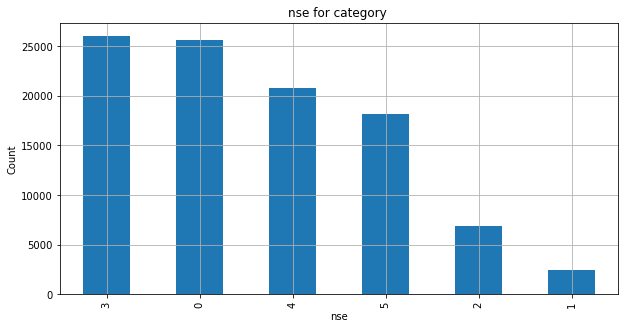

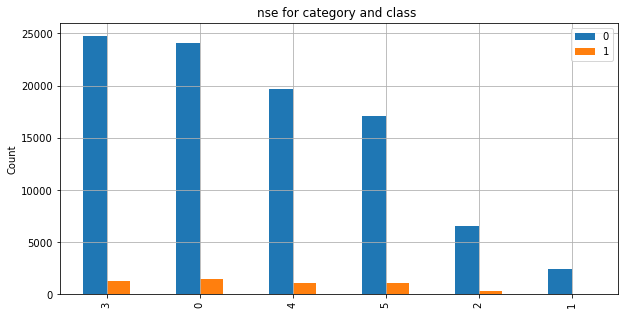

In [80]:
utils.plot_variable(df_numeric,'nse')
utils.plot_variable_per_target(df_numeric,'nse','client')

In [81]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0,25.422816,28.306177
3,26.174490,23.796893
4,20.798758,21.087533
5,18.089779,19.988632
2,6.951922,5.513452
1,2.562235,1.307313


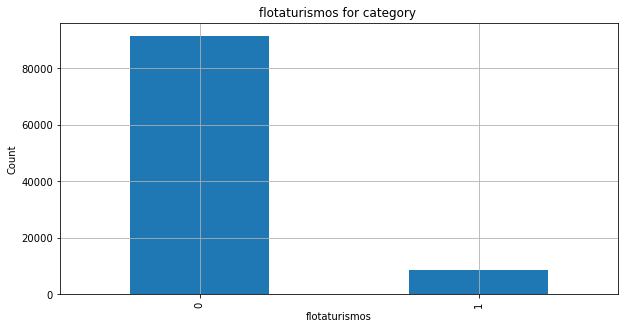

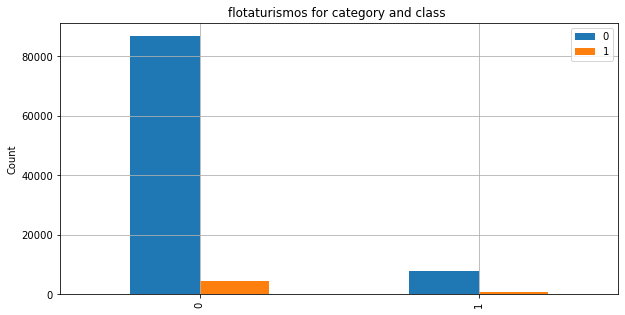

In [82]:
utils.plot_variable(df_numeric,'flotaturismos')
utils.plot_variable_per_target(df_numeric,'flotaturismos','client')

In [83]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0,91.765377,87.438424
1,8.234623,12.561576


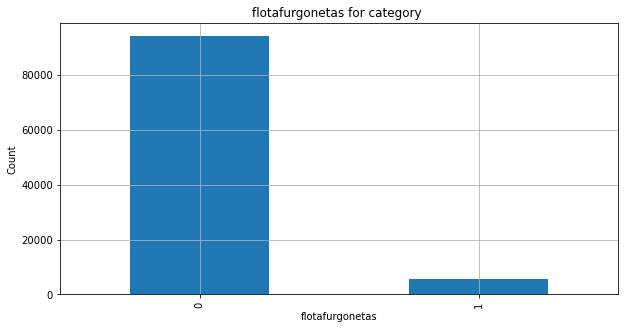

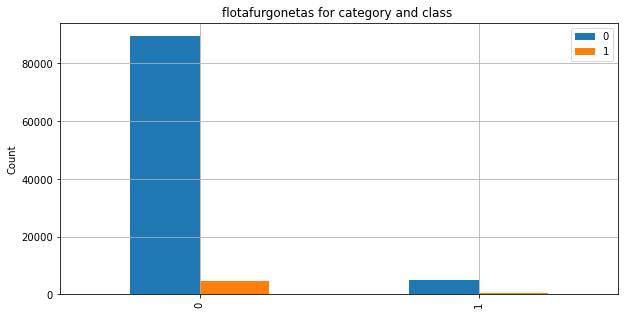

In [84]:
utils.plot_variable(df_numeric,'flotafurgonetas')
utils.plot_variable_per_target(df_numeric,'flotafurgonetas','client')

In [85]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0,94.643272,88.651004
1,5.356728,11.348996


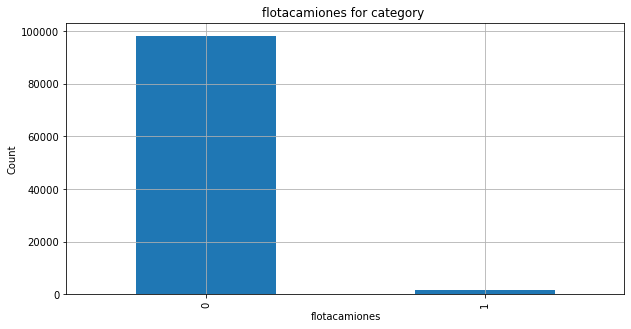

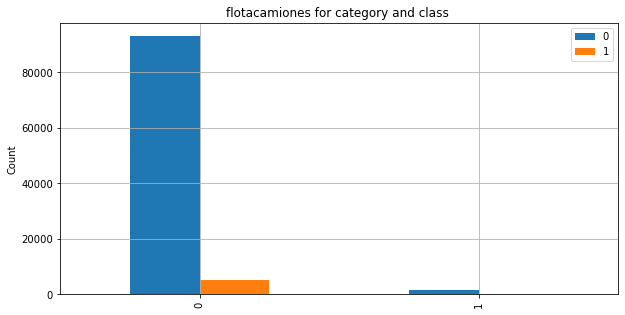

In [86]:
utils.plot_variable(df_numeric,'flotacamiones')
utils.plot_variable_per_target(df_numeric,'flotacamiones','client')

In [87]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0,98.295011,97.29064
1,1.704989,2.70936


The **flotacamiones** is added to col_remove since there is no difference between customer and non-customer. 97% of clients are not truck fleet

In [88]:
col_remove.append('flotacamiones')

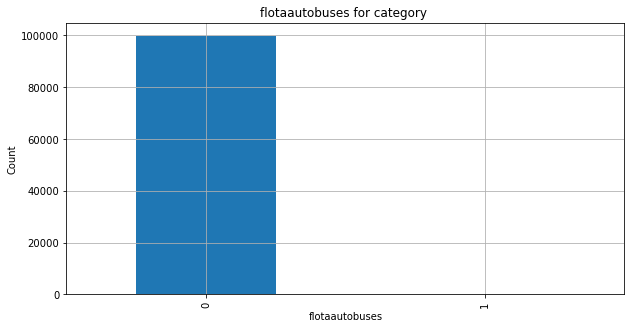

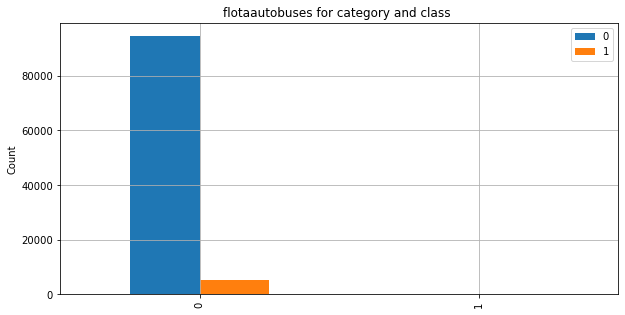

In [89]:
utils.plot_variable(df_numeric,'flotaautobuses')
utils.plot_variable_per_target(df_numeric,'flotaautobuses','client')

In [90]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0,99.952493,99.924214
1,0.047507,0.075786


The **flotaautobuses** is added to col_remove since there is no difference between customer and non-customer. 99% of clients are not bus fleet

In [91]:
col_remove.append('flotaautobuses')

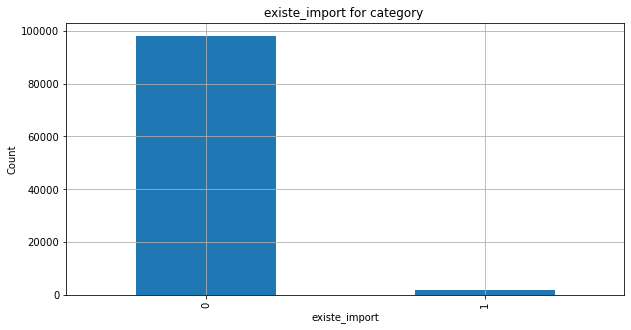

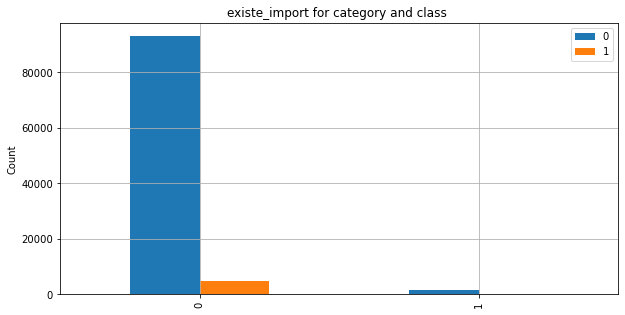

In [92]:
utils.plot_variable(df_numeric,'existe_import')
utils.plot_variable_per_target(df_numeric,'existe_import','client')

In [93]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0,98.458647,93.880258
1,1.541353,6.119742


The **existe_import** is added to col_remove since there is no difference between customer and non-customer. 94% of clients do not import

In [94]:
col_remove.append('existe_import')

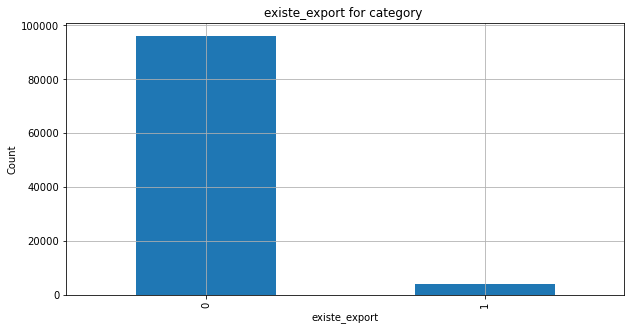

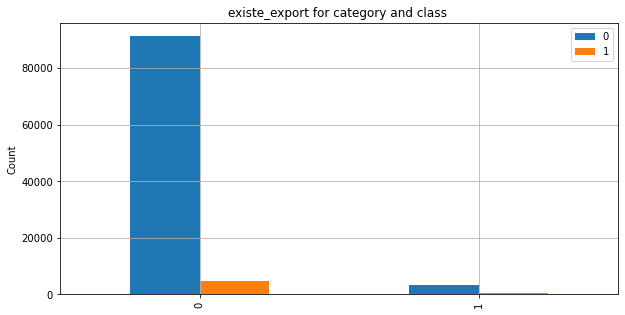

In [95]:
utils.plot_variable(df_numeric,'existe_export')
utils.plot_variable_per_target(df_numeric,'existe_export','client')

In [96]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0,96.521399,89.370974
1,3.478601,10.629026


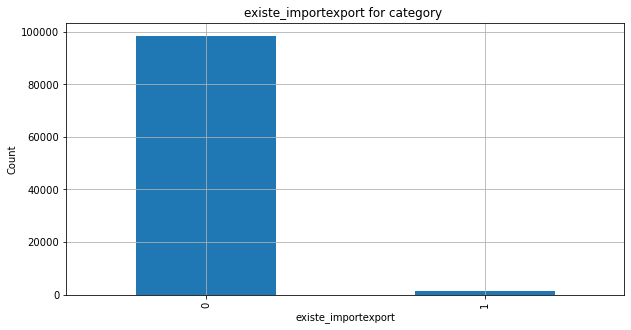

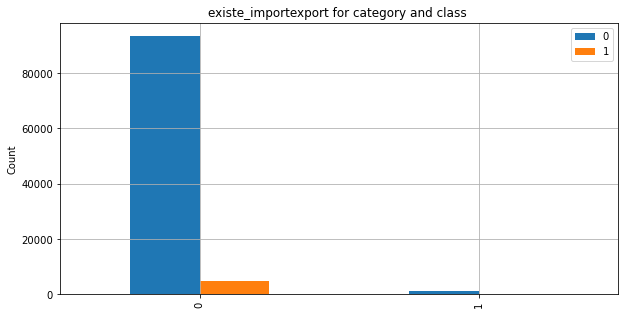

In [97]:
utils.plot_variable(df_numeric,'existe_importexport')
utils.plot_variable_per_target(df_numeric,'existe_importexport','client')

In [98]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0,98.776419,94.960212
1,1.223581,5.039788


The **existe_importexport** is added to col_remove since there is no difference between customer and non-customer. 95% of clients do not import or export

In [99]:
col_remove.append('existe_importexport')

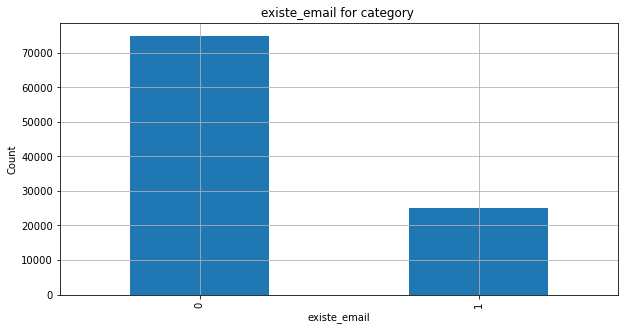

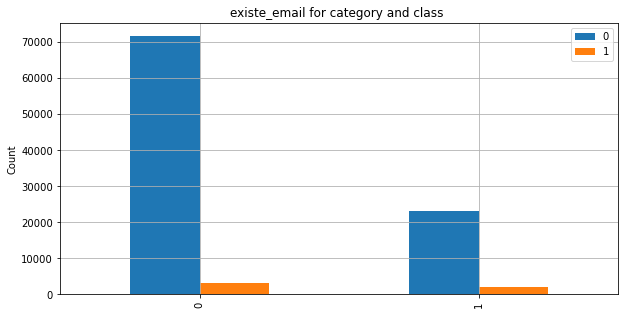

In [100]:
utils.plot_variable(df_numeric,'existe_email')
utils.plot_variable_per_target(df_numeric,'existe_email','client')

In [101]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0,75.680412,62.466844
1,24.319588,37.533156


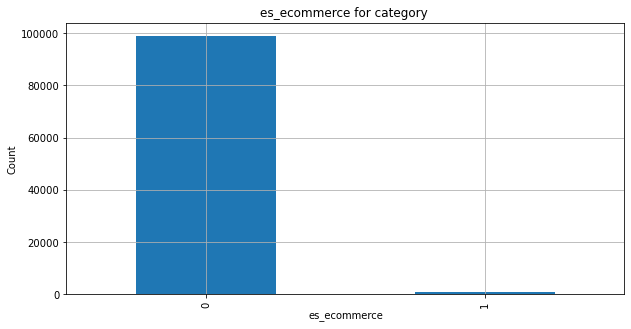

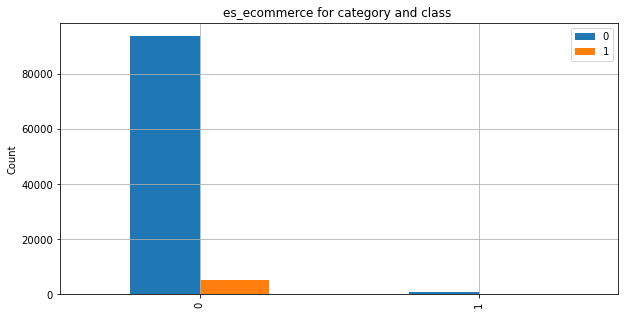

In [102]:
utils.plot_variable(df_numeric,'es_ecommerce')
utils.plot_variable_per_target(df_numeric,'es_ecommerce','client')

In [103]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0,99.061464,98.995832
1,0.938536,1.004168


The **es_ecommerce** is added to col_remove since there is no difference between customer and non-customer. 99% of clients are not ecommerce

In [104]:
col_remove.append('es_ecommerce')

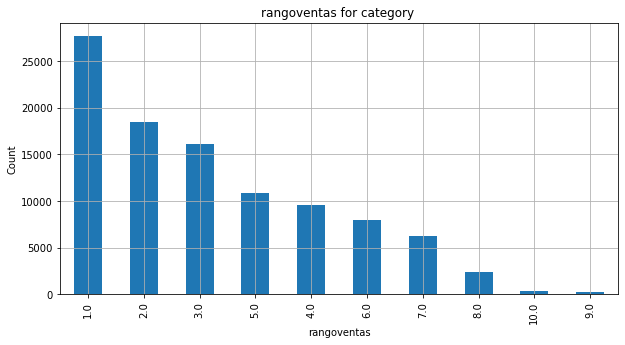

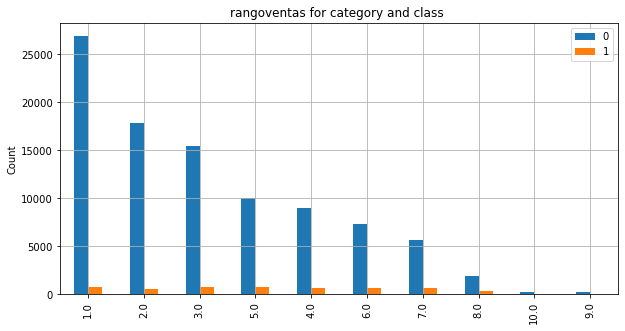

In [105]:
utils.plot_variable(df_numeric,'rangoventas')
utils.plot_variable_per_target(df_numeric,'rangoventas','client')

In [106]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
5.0,10.578436,15.119363
1.0,28.475206,14.323607
3.0,16.292058,13.679424
7.0,5.956440,12.618416
6.0,7.763854,12.504737
4.0,9.473084,12.296324
2.0,18.865933,10.363774
8.0,2.078736,7.218643
9.0,0.231205,1.004168
10.0,0.285048,0.871542


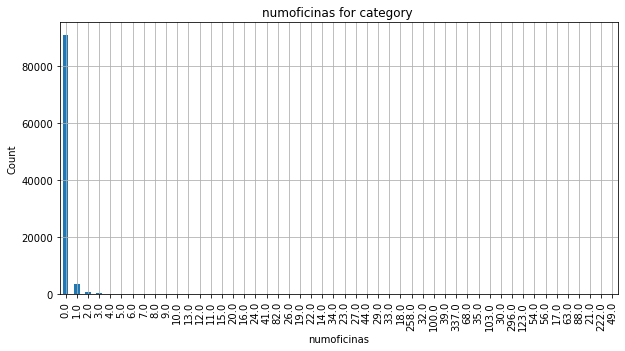

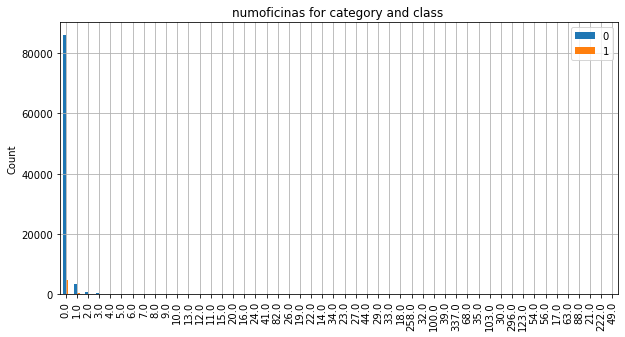

In [107]:
utils.plot_variable(df_numeric,'numoficinas')
utils.plot_variable_per_target(df_numeric,'numoficinas','client')

In [108]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
0.0,94.736436,91.645716
1.0,3.757643,4.834655
2.0,0.824015,1.798492
3.0,0.301845,0.560820
5.0,0.062793,0.212725
7.0,0.024236,0.212725
4.0,0.124484,0.193386
6.0,0.045167,0.116032
8.0,0.016524,0.077354
12.0,0.005508,0.058016


The **numoficinas** variable is eliminated since it more than 91% of clients does not office

In [109]:
col_remove.append('numoficinas')

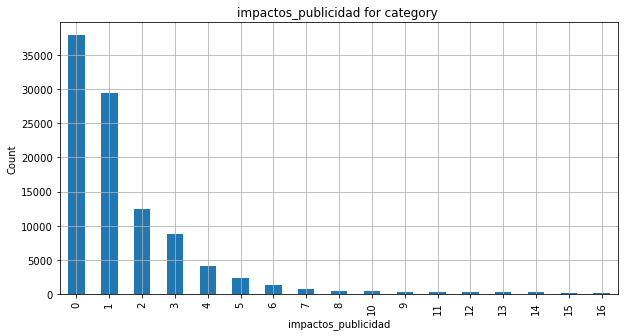

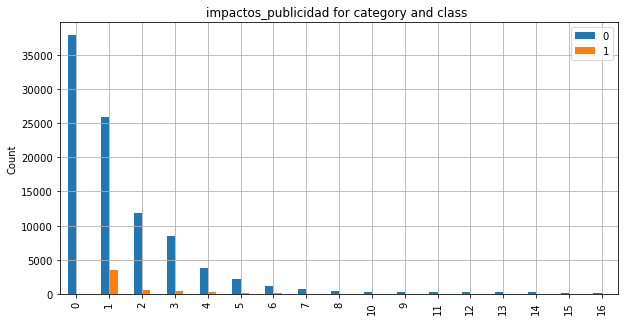

In [110]:
utils.plot_variable(df_numeric,'impactos_publicidad')
utils.plot_variable_per_target(df_numeric,'impactos_publicidad','client')

In [111]:
utils.df_class.apply(lambda x: (x / x.sum()*100)).sort_values(by=['1'],ascending=False)

,0,1
1,27.302000,66.464570
2,12.539853,10.212202
3,8.899728,8.071239
4,4.086696,5.589238
5,2.294082,2.519894
6,1.317540,1.667298
7,0.708389,1.117848
8,0.496189,1.042061
9,0.361057,0.776809
11,0.346276,0.644183


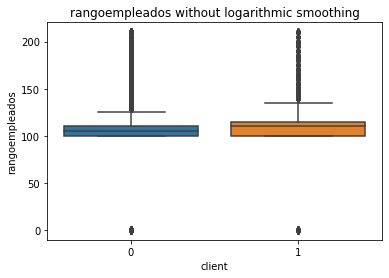

In [112]:
sns.boxplot(x='client',y='rangoempleados',data=df)
plt.title('rangoempleados without logarithmic smoothing')
plt.show()

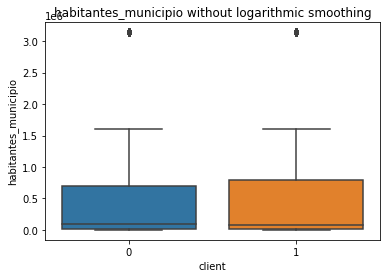

In [113]:
sns.boxplot(x='client',y='habitantes_municipio',data=df)
plt.title('habitantes_municipio without logarithmic smoothing')
plt.show()

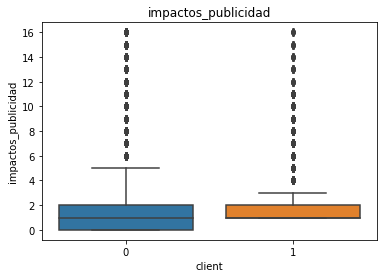

In [114]:
sns.boxplot(x='client',y='impactos_publicidad',data=df)
plt.title('impactos_publicidad')
plt.show()

In [115]:
df_log = df[['habitantes_municipio']].applymap(lambda x:np.log(x) if x>0 else x)
df_log['client'] = df['client']

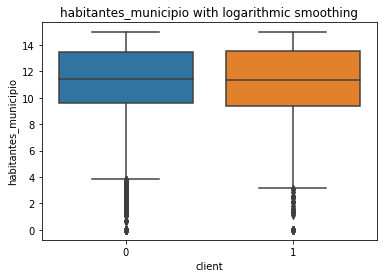

In [202]:
sns.boxplot(x='client',y='habitantes_municipio',data=df_log)
plt.title('habitantes_municipio with logarithmic smoothing')
plt.show()


The **habitantes_municipio** variable is eliminated since there is no difference in population between clients and non-clients   

In [117]:
col_remove.append('habitantes_municipio')

In [118]:
col_remove

['id',
 'tipo_empresa',
 'actcnae',
 'mercado',
 'anyofundacion',
 'tendenciaempleados',
 'tendenciaingresos',
 'flotacamiones',
 'flotaautobuses',
 'existe_import',
 'existe_importexport',
 'es_ecommerce',
 'numoficinas',
 'habitantes_municipio']

## Correlation between variables

In [119]:
df_num = df.select_dtypes(include = ['float64','int64']).copy()

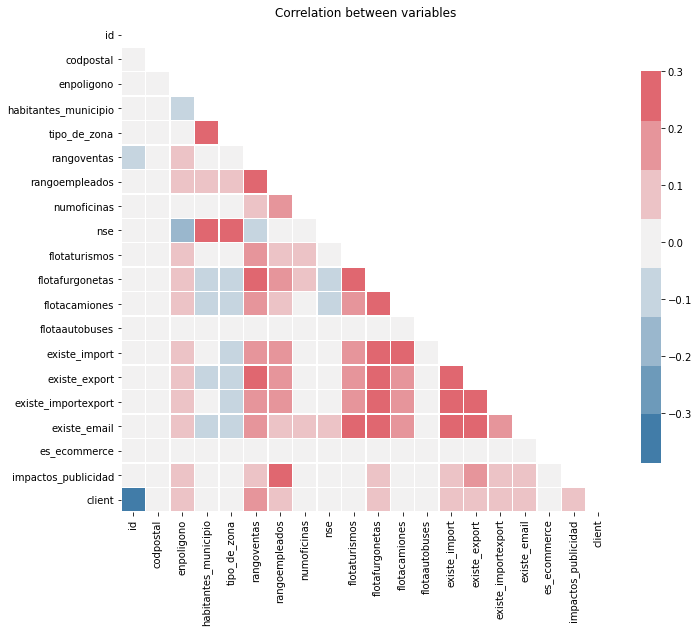

In [120]:
corr =  df_num.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(240, 10, n=9)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation between variables')
plt.show()

The following variables will be added to the list of variables to be eliminated since only the **comunidadautonoma** will be taken into account

In [121]:
for var in ['codpostal','municipio','provincia']:
    col_remove.append(var)

In [122]:
col_remove

['id',
 'tipo_empresa',
 'actcnae',
 'mercado',
 'anyofundacion',
 'tendenciaempleados',
 'tendenciaingresos',
 'flotacamiones',
 'flotaautobuses',
 'existe_import',
 'existe_importexport',
 'es_ecommerce',
 'numoficinas',
 'habitantes_municipio',
 'codpostal',
 'municipio',
 'provincia']

# Preprocess Data 

In this session, data is processed, cleaned, and training and test sets are created to train a propensity model to find potential customers.

In [123]:
df.columns

Index(['id', 'tipo_empresa', 'codpostal', 'municipio', 'provincia',
       'comunidadautonoma', 'capitalpueblo', 'enpoligono',
       'habitantes_municipio', 'tipo_de_zona', 'actcnae', 'mercado',
       'cnae_mercado', 'rangoventas', 'rangoempleados', 'numoficinas',
       'tipooficina', 'anyofundacion', 'nse', 'tendenciaempleados',
       'tendenciaingresos', 'flotaturismos', 'flotafurgonetas',
       'flotacamiones', 'flotaautobuses', 'universo', 'existe_import',
       'existe_export', 'existe_importexport', 'existe_email', 'es_ecommerce',
       'impactos_publicidad', 'client'],
      dtype='object')

In [124]:
preprocess = Preprocces(df)

Cleaning dataframe

In [125]:
df_clean = preprocess.clean_dataframe(col_remove)

[2021-02-07][15:19:00][scripts.preprocess_data][INFO] Shape of dataframe:(100000, 33)
[2021-02-07][15:19:00][scripts.preprocess_data][INFO] Transform column anyofundacion to company years example: 2021-2017 --> 4 year
[2021-02-07][15:19:00][scripts.preprocess_data][INFO] Remove variables ['id', 'tipo_empresa', 'actcnae', 'mercado', 'anyofundacion', 'tendenciaempleados', 'tendenciaingresos', 'flotacamiones', 'flotaautobuses', 'existe_import', 'existe_importexport', 'es_ecommerce', 'numoficinas', 'habitantes_municipio', 'codpostal', 'municipio', 'provincia']
[2021-02-07][15:19:00][scripts.preprocess_data][INFO] Shape of dataframe:(100000, 17)
[2021-02-07][15:19:00][scripts.preprocess_data][INFO] Dataframe is cleaned


In [126]:
df_clean.head()

,comunidadautonoma,capitalpueblo,enpoligono,tipo_de_zona,cnae_mercado,rangoventas,rangoempleados,tipooficina,nse,flotaturismos,flotafurgonetas,universo,existe_export,existe_email,impactos_publicidad,client,year
0,COMUNITAT VALENCIANA,CAPITAL,0,7,CONSTRUCCION,7.0,125.0,SEDE,4,0,0,ACTIVEBUSINESS,0,1,3,1,32.0
1,MADRID,CAPITAL,0,7,INFORMACION Y COMUNICACIONES,1.0,NaN,SEDE,3,0,0,MARKETBASE,0,1,2,1,9.0
2,CATALUNYA,PUEBLO,0,5,OTROS SERVICIOS,7.0,135.0,SEDE,5,0,0,ACTIVEBUSINESS,0,1,3,1,22.0
3,CATALUNYA,CAPITAL,0,7,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,6.0,100.0,SEDE,5,0,0,ACTIVEBUSINESS,0,0,1,1,6.0
4,MADRID,CAPITAL,1,7,INDUSTRIA MANUFACTURERA,4.0,120.0,SEDE,0,0,0,ACTIVEBUSINESS,0,0,5,1,8.0


In [127]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
enpoligono,100000.0,0.170770,0.376310,0.0,0.0,0.0,0.0,1.0
tipo_de_zona,100000.0,4.710400,2.134830,1.0,3.0,5.0,7.0,7.0
rangoventas,99999.0,3.222532,2.084130,1.0,1.0,3.0,5.0,10.0
rangoempleados,95996.0,107.880849,13.090275,0.0,100.0,105.0,110.0,210.0
nse,100000.0,2.686010,1.818663,0.0,0.0,3.0,4.0,5.0
flotaturismos,100000.0,0.084630,0.278332,0.0,0.0,0.0,0.0,1.0
flotafurgonetas,100000.0,0.056730,0.231327,0.0,0.0,0.0,0.0,1.0
existe_export,100000.0,0.038560,0.192545,0.0,0.0,0.0,0.0,1.0
existe_email,100000.0,0.250170,0.433113,0.0,0.0,0.0,1.0,1.0
impactos_publicidad,100000.0,1.557230,2.287199,0.0,0.0,1.0,2.0,16.0


In [128]:
df_clean[df_clean['client']==0].groupby(['comunidadautonoma'])['client'].agg(['count']).sort_values(by ='count',ascending=False).loc[community_not_client]

,count
comunidadautonoma,
CASTILLA Y LEON,4198
ARAGON,2579
CASTILLA-LA MANCHA,2752
MURCIA,2332
NAVARRA,1290
ASTURIAS,1267
EXTREMADURA,1544
LA RIOJA,717
CANTABRIA,793


In [129]:
df_clean[df_clean['client']==0].groupby(['cnae_mercado'])['client'].agg(['count']).sort_values(by ='count',ascending=False).loc[cnae_market_not_client]

,count
CONSTRUCCION,8051
ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXILIARES,3425
OTROS SERVICIOS,3905
TRANSPORTE Y ALMACENAMIENTO,2103
ACTIVIDADES SANITARIAS Y DE SERVICIOS SOCIALES,1728
"ACTIVIDADES ARTISTICAS, RECREATIVAS Y DE ENTRETENIMIENTO",1389
"AGRICULTURA, GANADERIA, SILVICULTURA Y PESCA",1318
EDUCACION,1390
HOSTELERIA,1952
ACTIVIDADES INMOBILIARIAS,2807


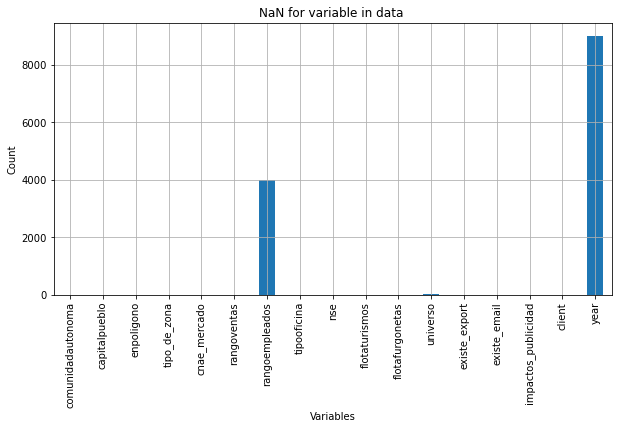

In [130]:
utils.plot_variables_nan(df_clean)

In [131]:
utils.df_nan

,Variables,Number_of_nan
0,comunidadautonoma,0
1,capitalpueblo,0
2,enpoligono,0
3,tipo_de_zona,0
4,cnae_mercado,0
5,rangoventas,1
6,rangoempleados,4004
7,tipooficina,0
8,nse,0
9,flotaturismos,0


## 1- Imputation of Missing Values in numerical Data 

In [132]:
df_clean = preprocess.fill_numerical_na(['rangoempleados','rangoventas','year'],df_clean)

In [133]:
df_clean.isna().sum()

comunidadautonoma       0
capitalpueblo           0
enpoligono              0
tipo_de_zona            0
cnae_mercado            0
rangoventas             0
rangoempleados          0
tipooficina             0
nse                     0
flotaturismos           0
flotafurgonetas         0
universo               13
existe_export           0
existe_email            0
impactos_publicidad     0
client                  0
year                    0
dtype: int64

In [134]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
enpoligono,100000.0,0.170770,0.376310,0.0,0.0,0.0,0.0,1.0
tipo_de_zona,100000.0,4.710400,2.134830,1.0,3.0,5.0,7.0,7.0
rangoventas,100000.0,3.222542,2.084122,1.0,1.0,3.0,5.0,10.0
rangoempleados,100000.0,107.700720,12.859431,0.0,100.0,105.0,110.0,210.0
nse,100000.0,2.686010,1.818663,0.0,0.0,3.0,4.0,5.0
flotaturismos,100000.0,0.084630,0.278332,0.0,0.0,0.0,0.0,1.0
flotafurgonetas,100000.0,0.056730,0.231327,0.0,0.0,0.0,0.0,1.0
existe_export,100000.0,0.038560,0.192545,0.0,0.0,0.0,0.0,1.0
existe_email,100000.0,0.250170,0.433113,0.0,0.0,0.0,1.0,1.0
impactos_publicidad,100000.0,1.557230,2.287199,0.0,0.0,1.0,2.0,16.0


## 2- Encoded Categorical variables to numeric

In [135]:
df_clean.select_dtypes('object').columns

Index(['comunidadautonoma', 'capitalpueblo', 'cnae_mercado', 'tipooficina',
       'universo'],
      dtype='object')

In [136]:
df_encode = pd.get_dummies(df_clean, columns = df_clean.select_dtypes('object').columns,prefix = 'is',drop_first=True)

In [137]:
df_encode.head()

,enpoligono,tipo_de_zona,rangoventas,rangoempleados,nse,flotaturismos,flotafurgonetas,existe_export,existe_email,impactos_publicidad,...,is_INDUSTRIAS EXTRACTIVAS,is_INFORMACION Y COMUNICACIONES,is_ORGANISMOS EXTRATERRITORIALES,is_OTROS SERVICIOS,"is_SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO, GESTION DE RESIDUOS Y DESCONTAMINACION","is_SUMINISTRO DE ENERGIA ELECTRICA, GAS, VAPOR Y AIRE ACONDICIONADO",is_TRANSPORTE Y ALMACENAMIENTO,is_SUCURSAL,is_UNICA,is_MARKETBASE
0,0,7,7.0,125.0,4,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
1,0,7,1.0,103.0,3,0,0,0,1,2,...,0,1,0,0,0,0,0,0,0,1
2,0,5,7.0,135.0,5,0,0,0,1,3,...,0,0,0,1,0,0,0,0,0,0
3,0,7,6.0,100.0,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,7,4.0,120.0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df_encode.columns

Index(['enpoligono', 'tipo_de_zona', 'rangoventas', 'rangoempleados', 'nse',
       'flotaturismos', 'flotafurgonetas', 'existe_export', 'existe_email',
       'impactos_publicidad', 'client', 'year', 'is_ARAGON', 'is_ASTURIAS',
       'is_BALEARS', 'is_CANARIAS', 'is_CANTABRIA', 'is_CASTILLA Y LEON',
       'is_CASTILLA-LA MANCHA', 'is_CATALUNYA', 'is_CEUTA',
       'is_COMUNITAT VALENCIANA', 'is_EXTREMADURA', 'is_GALICIA',
       'is_LA RIOJA', 'is_MADRID', 'is_MURCIA', 'is_NAVARRA', 'is_PAIS VASCO',
       'is_PUEBLO',
       'is_ACTIVIDADES ARTISTICAS, RECREATIVAS Y DE ENTRETENIMIENTO',
       'is_ACTIVIDADES FINANCIERAS Y DE SEGUROS',
       'is_ACTIVIDADES INMOBILIARIAS',
       'is_ACTIVIDADES PROFESIONALES, CIENTIFICAS Y TECNICAS',
       'is_ACTIVIDADES SANITARIAS Y DE SERVICIOS SOCIALES',
       'is_ADMINISTRACION PUBLICA Y DEFENSA; SEGURIDAD SOCIAL OBLIGATORIA',
       'is_AGRICULTURA, GANADERIA, SILVICULTURA Y PESCA',
       'is_COMERCIO AL POR MAYOR Y AL POR MENOR; REPARAC

In [139]:
df_encode.shape

(100000, 53)

## 3- Imputation of Missing Values in categorical Data with KnnImput

In [140]:
df_encode_clean = preprocess.fill_categorical_na(df_encode)

In [141]:
df_encode_clean.isna().sum()

enpoligono                                                                                   0
tipo_de_zona                                                                                 0
rangoventas                                                                                  0
rangoempleados                                                                               0
nse                                                                                          0
flotaturismos                                                                                0
flotafurgonetas                                                                              0
existe_export                                                                                0
existe_email                                                                                 0
impactos_publicidad                                                                          0
client                                            

In [142]:
df_encode_clean

,enpoligono,tipo_de_zona,rangoventas,rangoempleados,nse,flotaturismos,flotafurgonetas,existe_export,existe_email,impactos_publicidad,...,is_INDUSTRIAS EXTRACTIVAS,is_INFORMACION Y COMUNICACIONES,is_ORGANISMOS EXTRATERRITORIALES,is_OTROS SERVICIOS,"is_SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO, GESTION DE RESIDUOS Y DESCONTAMINACION","is_SUMINISTRO DE ENERGIA ELECTRICA, GAS, VAPOR Y AIRE ACONDICIONADO",is_TRANSPORTE Y ALMACENAMIENTO,is_SUCURSAL,is_UNICA,is_MARKETBASE
0,0.0,7.0,7.0,125.0,4.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,7.0,1.0,103.0,3.0,0.0,0.0,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,5.0,7.0,135.0,5.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,7.0,6.0,100.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,7.0,4.0,120.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,5.0,3.0,105.0,3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99996,0.0,7.0,2.0,100.0,2.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
99997,0.0,5.0,7.0,115.0,0.0,0.0,1.0,0.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99998,0.0,7.0,6.0,120.0,5.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Cheking that there is not NaN

In [143]:
df_encode_clean.isna().sum()

enpoligono                                                                                   0
tipo_de_zona                                                                                 0
rangoventas                                                                                  0
rangoempleados                                                                               0
nse                                                                                          0
flotaturismos                                                                                0
flotafurgonetas                                                                              0
existe_export                                                                                0
existe_email                                                                                 0
impactos_publicidad                                                                          0
client                                            

## 4 - Selecting the companies that are not potential clients

Two filters are applied to the dataframe to select the non-potential customers based on the following lists **cnae_market_not_client** and **community_not_client**. 

A dataframe called **df_not_client** was created 

In [144]:
df_clean[(df_clean['cnae_mercado'].isin(cnae_market_not_client)) & (df_clean['comunidadautonoma'].isin(community_not_client))][df_clean['client']==0]

,comunidadautonoma,capitalpueblo,enpoligono,tipo_de_zona,cnae_mercado,rangoventas,rangoempleados,tipooficina,nse,flotaturismos,flotafurgonetas,universo,existe_export,existe_email,impactos_publicidad,client,year
5278,CASTILLA-LA MANCHA,CAPITAL,0,5,"ACTIVIDADES ARTISTICAS, RECREATIVAS Y DE ENTRE...",3.0,105.0,UNICA,0,0,0,MARKETBASE,0,0,1,0,2.0
5292,NAVARRA,PUEBLO,0,3,TRANSPORTE Y ALMACENAMIENTO,4.0,120.0,SEDE,3,0,0,ACTIVEBUSINESS,0,1,1,0,23.0
5306,MURCIA,PUEBLO,0,1,CONSTRUCCION,2.0,100.0,UNICA,2,1,0,MARKETBASE,0,0,1,0,21.0
5330,ARAGON,PUEBLO,0,2,CONSTRUCCION,2.0,100.0,UNICA,3,0,0,MARKETBASE,0,0,1,0,25.0
5334,EXTREMADURA,PUEBLO,0,1,TRANSPORTE Y ALMACENAMIENTO,3.0,110.0,UNICA,1,0,0,ACTIVEBUSINESS,0,0,3,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99941,MURCIA,PUEBLO,0,3,CONSTRUCCION,2.0,100.0,SEDE,0,0,0,MARKETBASE,0,0,2,0,16.0
99946,CASTILLA Y LEON,PUEBLO,0,1,ACTIVIDADES FINANCIERAS Y DE SEGUROS,2.0,105.0,SEDE,3,0,0,MARKETBASE,0,0,1,0,13.0
99968,MURCIA,PUEBLO,0,1,TRANSPORTE Y ALMACENAMIENTO,7.0,115.0,SEDE,3,0,1,ACTIVEBUSINESS,1,1,1,0,14.0
99969,ASTURIAS,PUEBLO,0,1,TRANSPORTE Y ALMACENAMIENTO,2.0,100.0,UNICA,3,0,0,ACTIVEBUSINESS,0,0,2,0,30.0


In [145]:
df_not_client = df_clean[(df_clean['cnae_mercado'].isin(cnae_market_not_client)) & (df_clean['comunidadautonoma'].isin(community_not_client))][df_clean['client']==0]

In [146]:
df_not_client

,comunidadautonoma,capitalpueblo,enpoligono,tipo_de_zona,cnae_mercado,rangoventas,rangoempleados,tipooficina,nse,flotaturismos,flotafurgonetas,universo,existe_export,existe_email,impactos_publicidad,client,year
5278,CASTILLA-LA MANCHA,CAPITAL,0,5,"ACTIVIDADES ARTISTICAS, RECREATIVAS Y DE ENTRE...",3.0,105.0,UNICA,0,0,0,MARKETBASE,0,0,1,0,2.0
5292,NAVARRA,PUEBLO,0,3,TRANSPORTE Y ALMACENAMIENTO,4.0,120.0,SEDE,3,0,0,ACTIVEBUSINESS,0,1,1,0,23.0
5306,MURCIA,PUEBLO,0,1,CONSTRUCCION,2.0,100.0,UNICA,2,1,0,MARKETBASE,0,0,1,0,21.0
5330,ARAGON,PUEBLO,0,2,CONSTRUCCION,2.0,100.0,UNICA,3,0,0,MARKETBASE,0,0,1,0,25.0
5334,EXTREMADURA,PUEBLO,0,1,TRANSPORTE Y ALMACENAMIENTO,3.0,110.0,UNICA,1,0,0,ACTIVEBUSINESS,0,0,3,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99941,MURCIA,PUEBLO,0,3,CONSTRUCCION,2.0,100.0,SEDE,0,0,0,MARKETBASE,0,0,2,0,16.0
99946,CASTILLA Y LEON,PUEBLO,0,1,ACTIVIDADES FINANCIERAS Y DE SEGUROS,2.0,105.0,SEDE,3,0,0,MARKETBASE,0,0,1,0,13.0
99968,MURCIA,PUEBLO,0,1,TRANSPORTE Y ALMACENAMIENTO,7.0,115.0,SEDE,3,0,1,ACTIVEBUSINESS,1,1,1,0,14.0
99969,ASTURIAS,PUEBLO,0,1,TRANSPORTE Y ALMACENAMIENTO,2.0,100.0,UNICA,3,0,0,ACTIVEBUSINESS,0,0,2,0,30.0


In [147]:
index_not_client = list(df_not_client.index)

In [148]:
df_clean[(df_clean['cnae_mercado'].isin(cnae_market_not_client)) & (df_clean['comunidadautonoma'].isin(community_not_client))][df_clean['client']==1].shape

(107, 17)

There are only 107 customers that meet the filter mentioned above, this represents 2% of customers

## 5- Creating dataset to train a model 

In [149]:
df_encode_clean.head()

,enpoligono,tipo_de_zona,rangoventas,rangoempleados,nse,flotaturismos,flotafurgonetas,existe_export,existe_email,impactos_publicidad,...,is_INDUSTRIAS EXTRACTIVAS,is_INFORMACION Y COMUNICACIONES,is_ORGANISMOS EXTRATERRITORIALES,is_OTROS SERVICIOS,"is_SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO, GESTION DE RESIDUOS Y DESCONTAMINACION","is_SUMINISTRO DE ENERGIA ELECTRICA, GAS, VAPOR Y AIRE ACONDICIONADO",is_TRANSPORTE Y ALMACENAMIENTO,is_SUCURSAL,is_UNICA,is_MARKETBASE
0,0.0,7.0,7.0,125.0,4.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,7.0,1.0,103.0,3.0,0.0,0.0,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,5.0,7.0,135.0,5.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,7.0,6.0,100.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,7.0,4.0,120.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
df_encode_clean[df_encode_clean['client']==1]

,enpoligono,tipo_de_zona,rangoventas,rangoempleados,nse,flotaturismos,flotafurgonetas,existe_export,existe_email,impactos_publicidad,...,is_INDUSTRIAS EXTRACTIVAS,is_INFORMACION Y COMUNICACIONES,is_ORGANISMOS EXTRATERRITORIALES,is_OTROS SERVICIOS,"is_SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO, GESTION DE RESIDUOS Y DESCONTAMINACION","is_SUMINISTRO DE ENERGIA ELECTRICA, GAS, VAPOR Y AIRE ACONDICIONADO",is_TRANSPORTE Y ALMACENAMIENTO,is_SUCURSAL,is_UNICA,is_MARKETBASE
0,0.0,7.0,7.0,125.0,4.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,7.0,1.0,103.0,3.0,0.0,0.0,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,5.0,7.0,135.0,5.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,7.0,6.0,100.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,7.0,4.0,120.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,0.0,6.0,4.0,100.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5274,0.0,6.0,4.0,110.0,3.0,0.0,0.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5275,1.0,1.0,7.0,115.0,4.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5276,0.0,2.0,3.0,105.0,3.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
df_encode_clean.loc[index_not_client]

,enpoligono,tipo_de_zona,rangoventas,rangoempleados,nse,flotaturismos,flotafurgonetas,existe_export,existe_email,impactos_publicidad,...,is_INDUSTRIAS EXTRACTIVAS,is_INFORMACION Y COMUNICACIONES,is_ORGANISMOS EXTRATERRITORIALES,is_OTROS SERVICIOS,"is_SUMINISTRO DE AGUA, ACTIVIDADES DE SANEAMIENTO, GESTION DE RESIDUOS Y DESCONTAMINACION","is_SUMINISTRO DE ENERGIA ELECTRICA, GAS, VAPOR Y AIRE ACONDICIONADO",is_TRANSPORTE Y ALMACENAMIENTO,is_SUCURSAL,is_UNICA,is_MARKETBASE
5278,0.0,5.0,3.0,105.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5292,0.0,3.0,4.0,120.0,3.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5306,0.0,1.0,2.0,100.0,2.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5330,0.0,2.0,2.0,100.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5334,0.0,1.0,3.0,110.0,1.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99941,0.0,3.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99946,0.0,1.0,2.0,105.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99968,0.0,1.0,7.0,115.0,3.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99969,0.0,1.0,2.0,100.0,3.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [152]:
df_train = pd.concat([df_encode_clean[df_encode_clean['client']==1],df_encode_clean.loc[index_not_client]])

In [153]:
df_test = df_encode_clean.loc[~df_encode_clean.index.isin(df_train.index)]

In [154]:
df_test = df_test.drop(['client'],axis=1)

In [155]:
df_train.client.value_counts()

0.0    6063
1.0    5278
Name: client, dtype: int64

Now we have a training set, in which we have clients and non-clients

## 6- Take a look to the data

In [156]:
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [157]:
X = df_train.drop(['client'],axis=1)
Y = df_train.client

In [158]:
X.shape,Y.shape

((11341, 52), (11341,))

In [159]:
scaler = preprocessing.StandardScaler().fit(X)

Standardizing features by removing the mean and scaling to unit variance

In [160]:
Xs = scaler.transform(X)

In [161]:
Xs

array([[-0.44775767,  1.28399733,  1.57798065, ..., -0.06587378,
        -3.05430509, -0.8996383 ],
       [-0.44775767,  1.28399733, -1.04510066, ..., -0.06587378,
        -3.05430509,  1.11155783],
       [-0.44775767,  0.38202987,  1.57798065, ..., -0.06587378,
        -3.05430509, -0.8996383 ],
       ...,
       [-0.44775767, -1.42190506,  1.57798065, ..., -0.06587378,
        -3.05430509, -0.8996383 ],
       [-0.44775767, -1.42190506, -0.60792045, ..., -0.06587378,
         0.32740672, -0.8996383 ],
       [ 2.23335093, -1.42190506,  0.70362021, ..., -0.06587378,
         0.32740672, -0.8996383 ]])

T-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
by: **Scikit-learn**

In [162]:
X_tsne = TSNE(n_components=2, random_state=0,perplexity=50).fit_transform(Xs)

In [163]:
df_tsne = pd.DataFrame({'comp_1':X_tsne[:, 0],'comp_2':X_tsne[:, 1]})
df_tsne['client'] = Y.values.tolist()

In [164]:
df_tsne

,comp_1,comp_2,client
0,-58.010624,-43.520832,1.0
1,63.960674,-44.193024,1.0
2,3.284826,38.462612,1.0
3,-13.702920,-37.663956,1.0
4,-34.083649,-5.078753,1.0
...,...,...,...
11336,-22.919600,25.982742,0.0
11337,87.875824,-8.644760,0.0
11338,-34.659439,15.554616,0.0
11339,-60.212616,8.521581,0.0


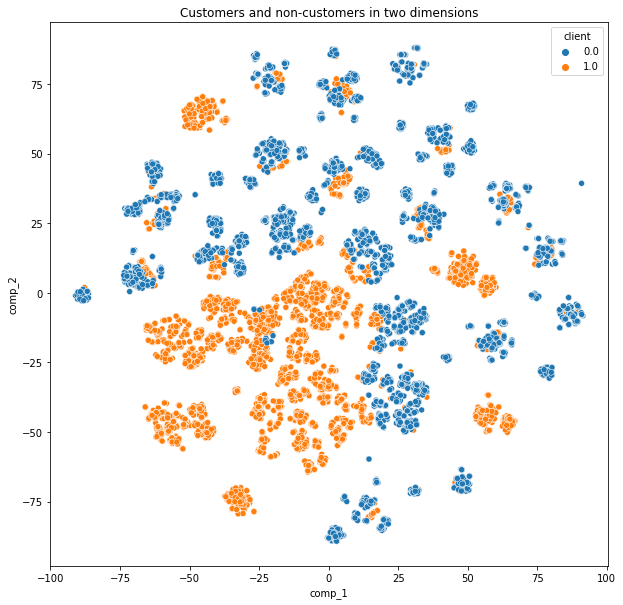

In [165]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="comp_1", y="comp_2", data=df_tsne, hue="client")
plt.title('Customers and non-customers in two dimensions')
plt.show()

In the previous graph it can be seen that customers and non-customers are separated and grouped together, you can see certain clusters that contain customers and non-customers but this is because there are 2% of customers that have the same characteristics as non-potential customers.

This chart also helps verify that customer segmentation was done correctly.

## 7 Split data to train the model

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2,shuffle=True,random_state =0)

In [168]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9072, 52), (2269, 52), (9072,), (2269,))

# Train a Model

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

### Try Difference Clasifier 

In [170]:
clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(activation='logistic', solver='adam', alpha=0.1, hidden_layer_sizes=(100, ), learning_rate= 'adaptive' ,random_state=1, max_iter=300),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(),
    'xgb': XGBClassifier()
}

In [171]:
f1_scores = dict()
for clf_name in clfs:
    print(f'Clasifier : {clf_name}')
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_scores[clf_name] = f1_score(y_pred, y_test)

Clasifier : mnb
Clasifier : gnb
Clasifier : mlp1
Clasifier : mlp2
Clasifier : ada
Clasifier : dtc
Clasifier : rfc
Clasifier : gbc
Clasifier : lr
Clasifier : xgb
[15:21:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [172]:
f1_scores

{'mnb': 0.97938662644545,
 'gnb': 0.9853756933938477,
 'mlp1': 0.991008991008991,
 'mlp2': 0.9914786967418545,
 'ada': 0.985390428211587,
 'dtc': 0.9680275454992622,
 'rfc': 0.9869083585095669,
 'gbc': 0.985390428211587,
 'lr': 0.9797979797979798,
 'xgb': 0.991}

Apparently all the models work correctly, what may be happening is that it is falling into an overfitting

In [173]:
best_model = max(f1_scores, key=f1_scores.get)
print(f'The best model is {best_model} with f1_score :{f1_scores[best_model]}')

The best model is mlp2 with f1_score :0.9914786967418545


### Try MLP 

It will be tested with MLP to show that it is falling into overfitting

In [174]:
clf =MLPClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)

In [175]:
proba

array([[1.25853594e-09, 9.99999999e-01],
       [9.92015962e-01, 7.98403807e-03],
       [1.78703006e-06, 9.99998213e-01],
       ...,
       [9.93223413e-01, 6.77658726e-03],
       [3.63471253e-10, 1.00000000e+00],
       [1.84874634e-03, 9.98151254e-01]])

In [176]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1276
         1.0       0.99      1.00      0.99       993

    accuracy                           0.99      2269
   macro avg       0.99      0.99      0.99      2269
weighted avg       0.99      0.99      0.99      2269



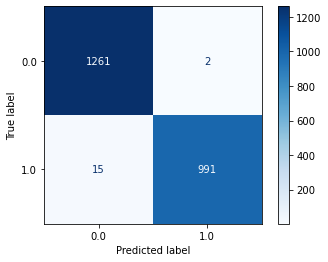

In [177]:
metrics.plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)

The prediction is made in the test set

In [178]:
result_mlp = np.argmax(clf.predict_proba(df_test.to_numpy()), axis=1)

In [179]:
result_mlp[result_mlp==0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [180]:
result_mlp[result_mlp==1].shape[0]*100/result_mlp.shape[0]

99.40897145241883

This result says that 99% are potential customers, which does not make sense

### Try LogisticRegression.

It will be tested with Logistic Regression to show a good result and it uses a hyperparameter C to avoid overfitting adding stronger regularization.

In [181]:
lr = LogisticRegression(C=0.001).fit(X_train, y_train)

In [182]:
lr.predict_proba(X_test)

array([[0.07948142, 0.92051858],
       [0.51009116, 0.48990884],
       [0.33330286, 0.66669714],
       ...,
       [0.58781193, 0.41218807],
       [0.06666302, 0.93333698],
       [0.66168637, 0.33831363]])

In [183]:
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88      1344
         1.0       0.80      0.87      0.84       925

    accuracy                           0.86      2269
   macro avg       0.86      0.86      0.86      2269
weighted avg       0.87      0.86      0.86      2269



In [184]:
accuracy_score(lr.predict(X_test), y_test)

0.8620537681798149

The table above shows what is the performance of the model by class. The model achieve 87% the accuracy for the class 1 and 85% for the class 0, in general the has 86% of accuracy.

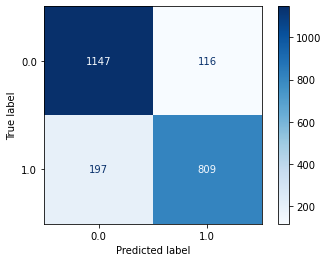

In [185]:
metrics.plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.Blues)

In [186]:
result_lr = np.argmax(lr.predict_proba(df_test.to_numpy()), axis=1)

In [187]:
result_lr[result_lr==0].shape[0]*100/result_lr.shape[0]

41.46448753087673

In [188]:
result_lr[result_lr==1].shape[0]*100/result_lr.shape[0]

58.53551246912327

In [189]:
proba_pred = lr.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test,proba_pred[:,1])
auc = roc_auc_score(y_test,proba_pred[:,1])

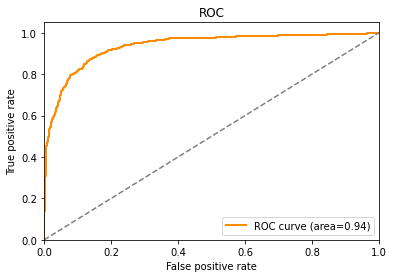

In [190]:
plt.figure()
lw=2
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area=%0.2f)' %auc)
plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

The auc of roc curve achieve 94% it is a very good result for the model 

# Choosing the best model

With the results obtained, the best model is lr for the train set

The model was called lr.


In [191]:
import pickle

Saving a model into a pickle, this avoid to train the model again.

In [192]:
try:
    clf_final = pickle.load(open('../../models/model_lr.pickle','rb'))
except:
    pickle.dump(lr, open('../../models/model_lr.pickle', 'wb'))

# Making Prediction 

In [193]:
result = clf_final.predict_proba(df_test.to_numpy())

In [194]:
result

array([[0.69907913, 0.30092087],
       [0.40463482, 0.59536518],
       [0.20234604, 0.79765396],
       ...,
       [0.25817618, 0.74182382],
       [0.28628061, 0.71371939],
       [0.15713991, 0.84286009]])

Creating a new dataframe called df_result to see and select the potencial clients

In [195]:
df_result = df_clean.loc[df_test.index].drop('client',axis=1).copy()

Creating new columns with probabilty for each class

In [196]:
df_result['proba_0'] = result[:,0].tolist()
df_result['proba_1'] = result[:,1].tolist()

Sort dataframe with the highest probability to class 1 that represent the potencial client

In [197]:
df_result.sort_values(by='proba_1',ascending=False).head(10)

,comunidadautonoma,capitalpueblo,enpoligono,tipo_de_zona,cnae_mercado,rangoventas,rangoempleados,tipooficina,nse,flotaturismos,flotafurgonetas,universo,existe_export,existe_email,impactos_publicidad,year,proba_0,proba_1
59080,MADRID,PUEBLO,1,6,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,7.0,0.0,UNICA,3,0,0,MARKETBASE,0,1,0,12.0,0.016746,0.983254
53776,MADRID,PUEBLO,1,5,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,7.0,0.0,UNICA,0,0,0,MARKETBASE,0,0,0,7.0,0.020202,0.979798
56021,CATALUNYA,PUEBLO,1,6,TRANSPORTE Y ALMACENAMIENTO,8.0,0.0,UNICA,0,0,0,ACTIVEBUSINESS,0,0,1,16.0,0.021286,0.978714
96933,CATALUNYA,CAPITAL,0,7,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,10.0,110.0,UNICA,5,0,0,ACTIVEBUSINESS,0,0,0,8.0,0.021429,0.978571
84535,MURCIA,PUEBLO,0,4,INDUSTRIA MANUFACTURERA,9.0,0.0,SEDE,3,0,1,ACTIVEBUSINESS,0,1,5,21.0,0.023763,0.976237
29158,MADRID,CAPITAL,0,7,"ACTIVIDADES PROFESIONALES, CIENTIFICAS Y TECNICAS",7.0,0.0,UNICA,4,0,0,MARKETBASE,0,0,2,6.0,0.024122,0.975878
21826,COMUNITAT VALENCIANA,PUEBLO,0,4,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,8.0,0.0,UNICA,0,0,0,MARKETBASE,0,0,0,12.0,0.025307,0.974693
90682,CATALUNYA,CAPITAL,0,7,INDUSTRIA MANUFACTURERA,10.0,110.0,UNICA,5,0,0,ACTIVEBUSINESS,0,0,2,12.0,0.029145,0.970855
88338,MADRID,CAPITAL,0,7,INDUSTRIA MANUFACTURERA,10.0,100.0,UNICA,5,0,0,ACTIVEBUSINESS,1,1,2,16.0,0.029992,0.970008
85888,MADRID,CAPITAL,0,7,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,10.0,115.0,UNICA,5,0,0,ACTIVEBUSINESS,0,1,0,12.0,0.030060,0.969940


In [198]:
list(set(df_clean.comunidadautonoma.unique().tolist())-set(community_not_client))

['COMUNITAT VALENCIANA',
 'CATALUNYA',
 'ANDALUCIA',
 'GALICIA',
 'MADRID',
 'PAIS VASCO']

In [199]:
list(set(df_clean.cnae_mercado.unique().tolist())-set(cnae_market_not_client))

['ACTIVIDADES PROFESIONALES, CIENTIFICAS Y TECNICAS',
 'INDUSTRIA MANUFACTURERA',
 'COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACION DE VEHICULOS DE MOTOR Y MOTOCICLETAS',
 'INFORMACION Y COMUNICACIONES']

## Criteria final in the choice of companies

In [200]:
df_result[(~df_result.impactos_publicidad.isin(community_not_client)) & (df_result.impactos_publicidad.isin([0,1,2,3])) & (df_result.proba_1>0.95)].sort_values(by='proba_1',ascending=False)

,comunidadautonoma,capitalpueblo,enpoligono,tipo_de_zona,cnae_mercado,rangoventas,rangoempleados,tipooficina,nse,flotaturismos,flotafurgonetas,universo,existe_export,existe_email,impactos_publicidad,year,proba_0,proba_1
59080,MADRID,PUEBLO,1,6,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,7.0,0.0,UNICA,3,0,0,MARKETBASE,0,1,0,12.0,0.016746,0.983254
53776,MADRID,PUEBLO,1,5,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,7.0,0.0,UNICA,0,0,0,MARKETBASE,0,0,0,7.0,0.020202,0.979798
56021,CATALUNYA,PUEBLO,1,6,TRANSPORTE Y ALMACENAMIENTO,8.0,0.0,UNICA,0,0,0,ACTIVEBUSINESS,0,0,1,16.0,0.021286,0.978714
96933,CATALUNYA,CAPITAL,0,7,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,10.0,110.0,UNICA,5,0,0,ACTIVEBUSINESS,0,0,0,8.0,0.021429,0.978571
29158,MADRID,CAPITAL,0,7,"ACTIVIDADES PROFESIONALES, CIENTIFICAS Y TECNICAS",7.0,0.0,UNICA,4,0,0,MARKETBASE,0,0,2,6.0,0.024122,0.975878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16574,MADRID,CAPITAL,0,7,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,8.0,105.0,UNICA,4,0,0,ACTIVEBUSINESS,0,0,0,7.0,0.049318,0.950682
48305,MADRID,CAPITAL,1,7,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,8.0,110.0,UNICA,4,0,0,ACTIVEBUSINESS,0,0,0,9.0,0.049512,0.950488
31157,MADRID,CAPITAL,1,7,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,10.0,145.0,UNICA,0,0,0,ACTIVEBUSINESS,1,1,0,14.0,0.049568,0.950432
5566,PAIS VASCO,CAPITAL,0,6,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,9.0,105.0,UNICA,3,0,0,ACTIVEBUSINESS,0,1,0,10.0,0.049599,0.950401


In [201]:
df_result[(~df_result.impactos_publicidad.isin(community_not_client)) & (df_result.impactos_publicidad.isin([0,1,2,3])) & (df_result.proba_1>0.95)].sort_values(by='proba_1',ascending=False).to_csv('../../result/predict_potencial_client.csv')